In [ ]:
import pandas as pd

# Paths of files
file_meteo_csv = '/content/dati_meteo_storici_(Cicalino1).csv'
file_catture_csv = '/content/grafico_delle_catture_(Cicalino 1).csv'

In [ ]:
file_catture_csv

'/content/grafico_delle_catture_(Cicalino 1).csv'

In [ ]:
import pandas as pd

# Read the CSV files with the correct separator and skip unnecessary rows
meteo_df = pd.read_csv(file_meteo_csv, sep=',', skiprows=2) # Changed separator to ','
catture_df = pd.read_csv(file_catture_csv, sep=',', skiprows=2) # Changed separator to ','

# Rename the columns for clarity
meteo_df.columns = ['DateTime', 'Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita']
catture_df.columns = ['DateTime', 'Numero_Insetti', 'Nuove_Catture', 'Recensito', 'Evento']




# Data Cleaning: Converting Numerical Values
meteo_df['Media_Temperatura'] = (
    meteo_df['Media_Temperatura']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .astype(float)
)
catture_df['Numero_Insetti'] = catture_df['Numero_Insetti'].fillna(0).astype(int)
catture_df['Nuove_Catture'] = catture_df['Nuove_Catture'].fillna(0).astype(int)

# Convert the DateTime columns into uniform datetime objects
meteo_df['DateTime'] = pd.to_datetime(meteo_df['DateTime'], format='%d.%m.%Y %H:%M:%S', errors='coerce')
catture_df['DateTime'] = pd.to_datetime(catture_df['DateTime'], format='%d.%m.%Y %H:%M:%S', errors='coerce')

# Remove any rows with NaT values in the dates" or "Let's remove any rows with NaT values in the dates
meteo_df = meteo_df.dropna(subset=['DateTime'])
catture_df = catture_df.dropna(subset=['DateTime'])

# We filter the weather rows to include only the 6:00 AM hours
meteo_filtered = meteo_df[meteo_df['DateTime'].dt.hour == 6]

# We standardize the time by rounding it to the nearest hour
catture_df['DateTime'] = catture_df['DateTime'].dt.floor('H')
meteo_filtered['DateTime'] = meteo_filtered['DateTime'].dt.floor('H')

# We merge the datasets on the dates
merged_data = pd.merge(
    catture_df[['DateTime', 'Numero_Insetti', "Nuove_Catture"]],
    meteo_filtered[['DateTime', 'Media_Temperatura']],
    on='DateTime',
    how='inner'
)

# We visualize the result
print(merged_data)



              DateTime  Numero_Insetti  Nuove_Catture  Media_Temperatura
0  2024-07-08 06:00:00               0              0              19.03
1  2024-07-09 06:00:00               0              0              15.33
2  2024-07-09 06:00:00               0              0              15.33
3  2024-07-10 06:00:00               0              0              15.48
4  2024-07-11 06:00:00               0              0              16.21
5  2024-07-12 06:00:00               0              0              16.58
6  2024-07-13 06:00:00               0              0              18.87
7  2024-07-14 06:00:00               1              1              17.46
8  2024-07-15 06:00:00               1              0              16.41
9  2024-07-16 06:00:00               2              1              16.08
10 2024-07-16 06:00:00               0              0              16.08
11 2024-07-17 06:00:00               1              1              17.31
12 2024-07-18 06:00:00               1             

<ipython-input-1404-d46c95f794d5>:36: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  catture_df['DateTime'] = catture_df['DateTime'].dt.floor('H')
<ipython-input-1404-d46c95f794d5>:37: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  meteo_filtered['DateTime'] = meteo_filtered['DateTime'].dt.floor('H')
<ipython-input-1404-d46c95f794d5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meteo_filtered['DateTime'] = meteo_filtered['DateTime'].dt.floor('H')


In [ ]:
import pandas as pd

# We read the CSV files using the correct separator, which is ',' in this case
meteo_df = pd.read_csv(file_meteo_csv, sep=',', skiprows=2)
catture_df = pd.read_csv(file_catture_csv, sep=',', skiprows=2)

# We rename the columns for clarity
meteo_df.columns = ['DateTime', 'Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita']
catture_df.columns = ['DateTime', 'Numero_Insetti', 'Nuove_Catture', 'Recensito', 'Evento']

# Data Cleaning: Converting Numerical Values
meteo_df['Media_Temperatura'] = (
    meteo_df['Media_Temperatura']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .astype(float)
)
catture_df['Numero_Insetti'] = catture_df['Numero_Insetti'].fillna(0).astype(int)
catture_df['Nuove_Catture'] = catture_df['Nuove_Catture'].fillna(0).astype(int)

# Convert the DateTime columns into uniform datetime objects
meteo_df['DateTime'] = pd.to_datetime(meteo_df['DateTime'], format='%d.%m.%Y %H:%M:%S', errors='coerce')
catture_df['DateTime'] = pd.to_datetime(catture_df['DateTime'], format='%d.%m.%Y %H:%M:%S', errors='coerce')

# Create a column for the date only (excluding the time)
meteo_df['Date'] = meteo_df['DateTime'].dt.date
catture_df['Date'] = catture_df['DateTime'].dt.date

# We filter the capture rows to include only the 6:00 AM hours
catture_filtered = catture_df[catture_df['DateTime'].dt.hour == 6][['Date', 'Numero_Insetti', 'Nuove_Catture']]

# We add the 'Numero_Insetti' column to the weather dataset based on the date
meteo_with_catture = pd.merge(meteo_df, catture_filtered, on='Date', how='left')

# Fill the NaN values for captures with 0 (if there is no capture data for that day)
meteo_with_catture['Numero_Insetti'] = meteo_with_catture['Numero_Insetti'].fillna(0).astype(int)
meteo_with_catture['Nuove_Catture'] = meteo_with_catture['Nuove_Catture'].fillna(0).astype(int)

# Displaying the final dataset
print(meteo_with_catture)

# We save the result in a CSV file
meteo_with_catture.to_csv('meteo_with_catture.csv', index=False)


                DateTime  Media_Temperatura Low_Temp High_Temp Media_Umidita  \
0    2024-07-05 16:00:00              31.45       31      32,2         33,55   
1    2024-07-05 17:00:00              31.66     31,2      32,1         34,98   
2    2024-07-05 18:00:00              30.08     29,2      30,8         42,39   
3    2024-07-05 19:00:00              28.78     26,5      29,6         47,54   
4    2024-07-05 20:00:00              24.26     22,4        26         59,08   
...                  ...                ...      ...       ...           ...   
1378 2024-08-23 02:00:00              19.57     19,5      19,8         87,25   
1379 2024-08-23 03:00:00              19.92     19,7      20,2         86,89   
1380 2024-08-23 04:00:00              19.57       19      19,8         88,57   
1381 2024-08-23 05:00:00              18.58     18,4      18,9         92,14   
1382 2024-08-23 06:00:00              18.36     18,3      18,4          93,3   

            Date  Numero_Insetti  Nuove

In [ ]:
import pandas as pd
meteo_with_catture=pd.read_csv("/content/meteo_with_catture.csv")

Problem Type:

We are in the scenario where we want to predict the number of pests (insects) captured, or their presence, using meteorological data along with their presence in previous time intervals.

Target Variable:

Regression Problem: NUMBER OF INSECTS CAPTURED.

Classification Problem: NEW CAPTURES.
*italicized text*

In [ ]:
print(meteo_with_catture)

                 DateTime  Media_Temperatura Low_Temp High_Temp Media_Umidita  \
0     2024-07-05 16:00:00              31.45       31      32,2         33,55   
1     2024-07-05 17:00:00              31.66     31,2      32,1         34,98   
2     2024-07-05 18:00:00              30.08     29,2      30,8         42,39   
3     2024-07-05 19:00:00              28.78     26,5      29,6         47,54   
4     2024-07-05 20:00:00              24.26     22,4        26         59,08   
...                   ...                ...      ...       ...           ...   
1378  2024-08-23 02:00:00              19.57     19,5      19,8         87,25   
1379  2024-08-23 03:00:00              19.92     19,7      20,2         86,89   
1380  2024-08-23 04:00:00              19.57       19      19,8         88,57   
1381  2024-08-23 05:00:00              18.58     18,4      18,9         92,14   
1382  2024-08-23 06:00:00              18.36     18,3      18,4          93,3   

            Date  Numero_In

In [ ]:
print(type(meteo_with_catture.index))

<class 'pandas.core.indexes.range.RangeIndex'>


In [ ]:
print(meteo_with_catture.columns)

Index(['DateTime', 'Media_Temperatura', 'Low_Temp', 'High_Temp',
       'Media_Umidita', 'Date', 'Numero_Insetti', 'Nuove_Catture'],
      dtype='object')


<Axes: >

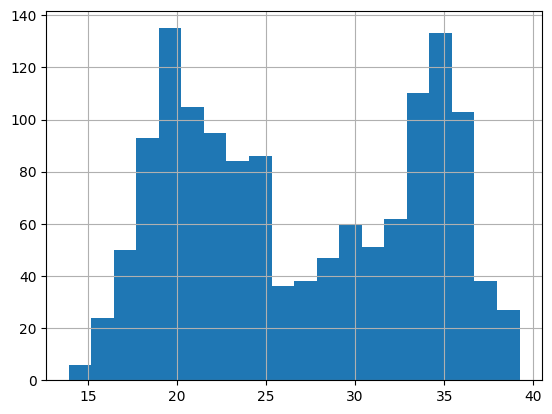

In [ ]:
meteo_with_catture['Media_Temperatura'].hist(bins=20)

<Axes: >

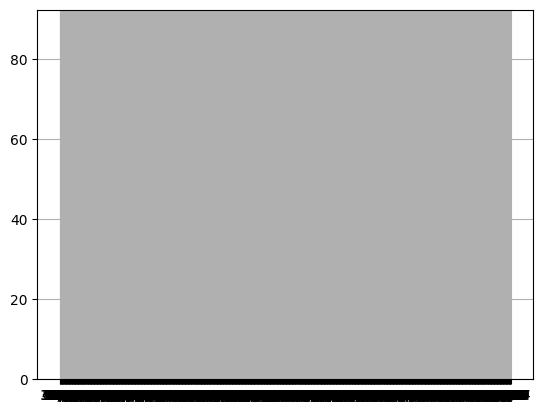

In [ ]:
meteo_with_catture['Media_Umidita'].hist(bins=20)

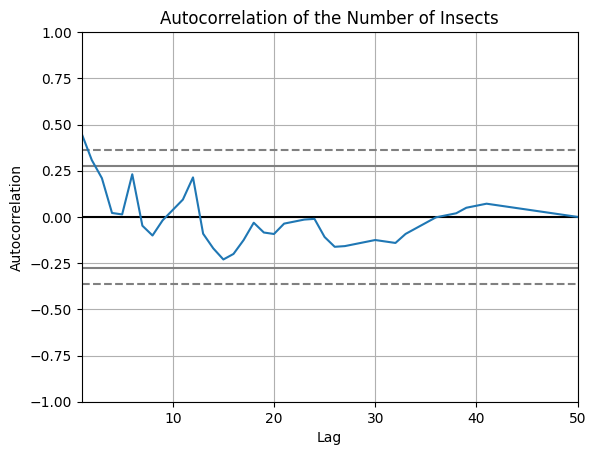

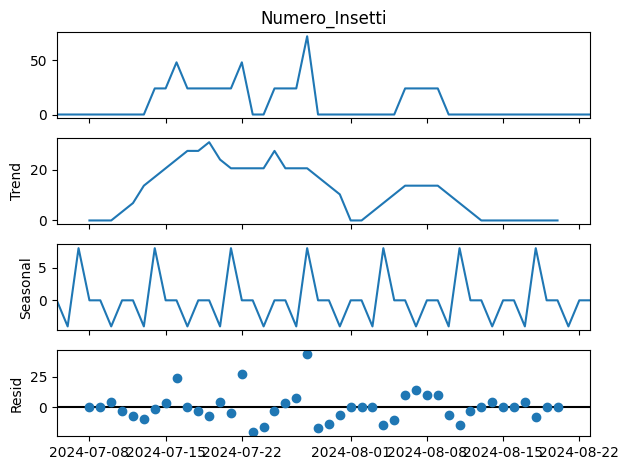

In [ ]:

from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
meteo_with_catture['Date'] = pd.to_datetime(meteo_with_catture['Date'])
daily_insects = meteo_with_catture.set_index('Date')['Numero_Insetti'].resample('D').sum()

autocorrelation_plot(daily_insects)
plt.title('Autocorrelation of the Number of Insects')
plt.show()

decomposition = seasonal_decompose(daily_insects, model='additive', period=7)
decomposition.plot()
plt.show()

In the ***autocorrelation plot***, we observed a significant peak at a lag of 7, which suggests the presence of a weekly periodicity in the number of insects captured. This result seems to confirm that the number of captured insects tends to follow a recurring pattern every 7 days. It is an important finding because it allows us to hypothesize that the behavior of insects, or perhaps the environmental conditions that influence their activity, follow a weekly cycle.

In the ***seasonal decomposition plot***, we noticed that the original time series of insect counts exhibits some variability over time, with moments of clear peaks followed by more stable or decreasing periods. When we observe the trend component, we can see an initial growth, which culminates in a maximum around the middle of the analyzed period, followed by a gradual reduction. Initially, we hypothesized that this trend could reflect a gradual change in climatic or environmental conditions, such as an increase in temperature or humidity, which could have favored the proliferation of insects in a certain time interval. However, subsequent analyses showed that there is no significant correlation between temperature, humidity, and the number of insects captured. This result leads us to revise our initial hypothesis and consider that the observed trend is probably influenced by other factors not directly related to the analyzed climatic variables, such as specific local conditions or insect activity cycles not directly linked to changes in temperature or humidity.

The ***seasonality*** in the plot is very clear: there is a regular repetition of a pattern with well-defined peaks and troughs. This component confirms the existence of a weekly periodicity, in line with what was highlighted by the autocorrelation. It is interesting to note how the cycles are quite regular, which leads us to think that certain environmental conditions, or perhaps activities related to insect capture, repeat predictably from week to week

# ***Residual Analysis***

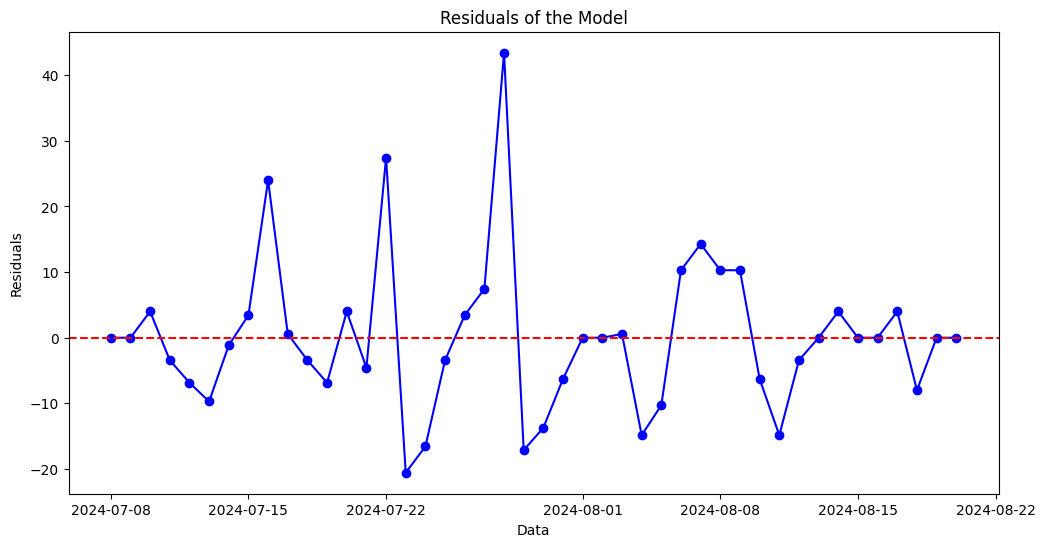

In [ ]:
# Estrai i residui dalla decomposizione
residui = decomposition.resid

# Visualizza i residui
plt.figure(figsize=(12, 6))
plt.plot(residui, marker='o', linestyle='-', color='b')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals of the Model")
plt.xlabel("Data")
plt.ylabel("Residuals")
plt.show()

In [ ]:
import seaborn as sns
# Threshold Calculation
soglia = 3 * residui.std()  # 3 deviazioni standard
eventi_eccezionali = residui[abs(residui) > soglia]

# Display the days with unusual events
print("Eventi eccezionali nei residui:")
print(eventi_eccezionali)

Eventi eccezionali nei residui:
Date
2024-07-28    43.428571
Freq: D, Name: resid, dtype: float64


In [ ]:
# Converts 'DateTime' to datetime and sets it as the index
meteo_with_catture['DateTime'] = pd.to_datetime(meteo_with_catture['DateTime'])
meteo_with_catture.set_index('DateTime', inplace=True)

In [ ]:
# Extract the data for July 28, 2024
evento_28_luglio = meteo_with_catture.loc['2024-07-28']
#print(evento_28_luglio[['Media_Temperatura', 'Media_Umidita', 'Numero_Insetti']])


In [ ]:
# Comparison with nearby days
confronto_giorni = meteo_with_catture.loc['2024-07-26':'2024-07-30']
print(confronto_giorni[['Media_Temperatura', 'Media_Umidita', 'Numero_Insetti']])

                     Media_Temperatura Media_Umidita  Numero_Insetti
DateTime                                                            
2024-07-26 00:00:00              21.35         86,84               1
2024-07-26 01:00:00              20.51         87,53               1
2024-07-26 02:00:00              19.76         87,89               1
2024-07-26 03:00:00              19.35         87,65               1
2024-07-26 04:00:00              18.95         89,13               1
...                                ...           ...             ...
2024-07-30 19:00:00              35.92         26,58               0
2024-07-30 20:00:00              31.50         35,19               0
2024-07-30 21:00:00              28.05         45,58               0
2024-07-30 22:00:00              26.42         49,81               0
2024-07-30 23:00:00              24.35         56,12               0

[144 rows x 3 columns]


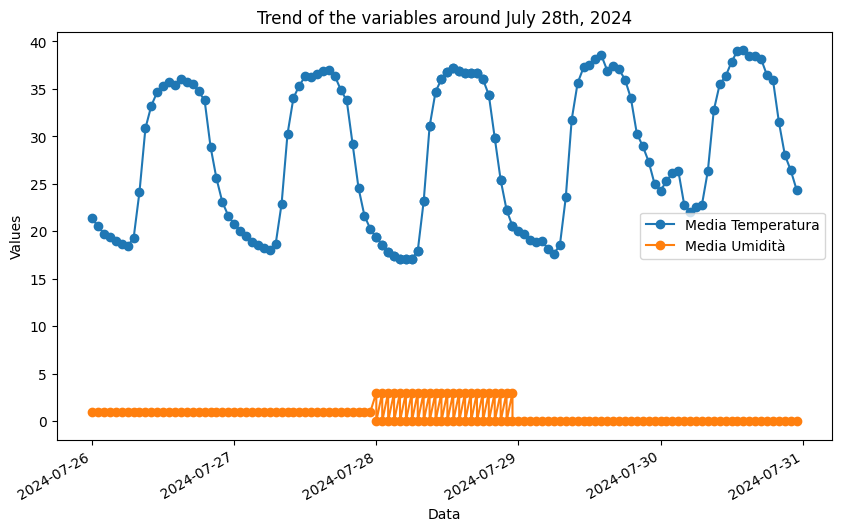

In [ ]:
# Plot of climatic variables around July 28th
confronto_giorni[['Media_Temperatura', 'Media_Umidita', 'Numero_Insetti']].plot(
    figsize=(10, 6), marker='o')
plt.title("Trend of the variables around July 28th, 2024")
plt.xlabel("Data")
plt.ylabel("Values")
plt.legend(["Media Temperatura", "Media Umidità", "Numero Insetti"])
plt.show()


In the analyzed days, the Number of Insects gradually decreases, going from 1 insect per hour on July 26th to values close to zero on July 30th. However, July 28th seems to coincide with an unusual event (identified in the residuals), and this discrepancy does not appear to be immediately explainable by the climatic variables.

From the graph, we noticed that the temperature does not seem to have particular variations that could explain the peak in the residuals or the number of insects captured on July 28th. Humidity, on the other hand, shows a clear anomaly. This irregular oscillation could indicate that the humidity data is not reliable for that period. This could affect the overall interpretation and the results of the model.

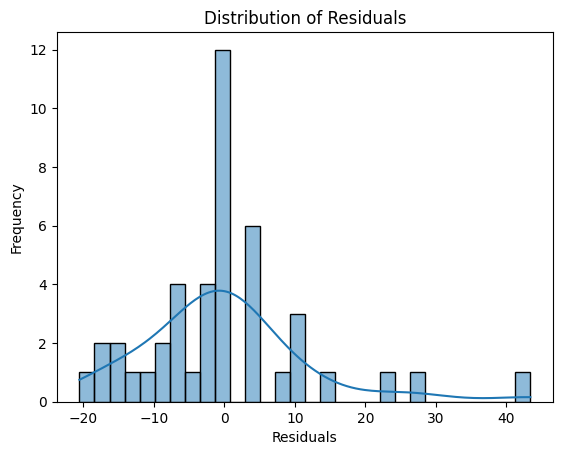

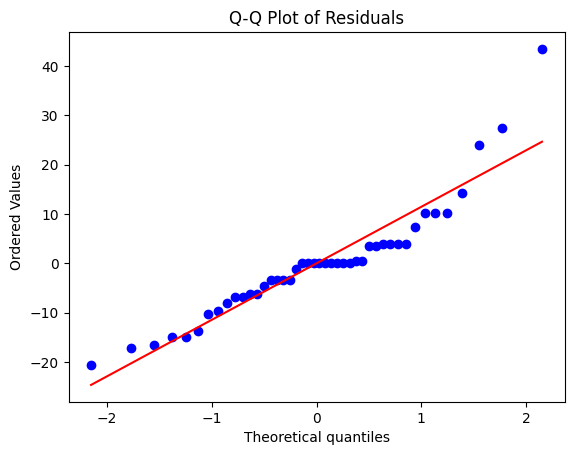

In [ ]:
import seaborn as sns
from scipy.stats import probplot

# Histogram of Residuals
sns.histplot(residui.dropna(), kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Q-Q Plot
probplot(residui.dropna(), dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

Observing the histogram, we noticed that the majority of residuals are concentrated around zero, which is a positive sign: it indicates that, on average, the model is able to make relatively accurate predictions. However, the distribution is not perfectly normal. We see asymmetry and the presence of a longer right tail, with positive residuals reaching extreme values beyond 40. This suggests that the model tends to underestimate the number of insects captured in some particular situations. Also, the extremely negative values (down to -20) indicate days when the model has overestimated the number of insects.

The Q-Q plot confirms these observations. In the central part of the distribution, the points align quite well with the diagonal line, suggesting that the residuals approximately follow a normal distribution for standard cases. However, at the ends of the distribution, the points deviate significantly from the line, revealing outliers in both the positive and negative tails. These outliers correspond to the exceptional events that the model fails to adequately explain.

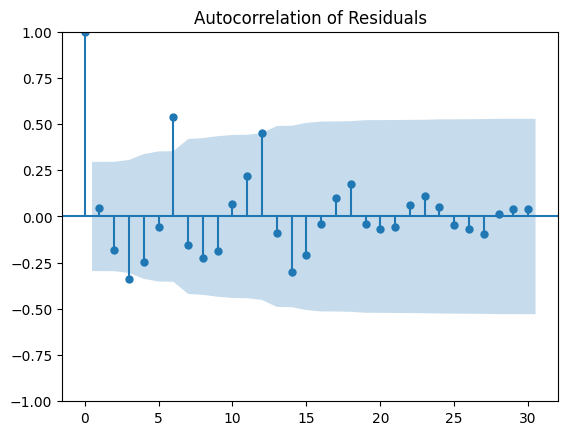

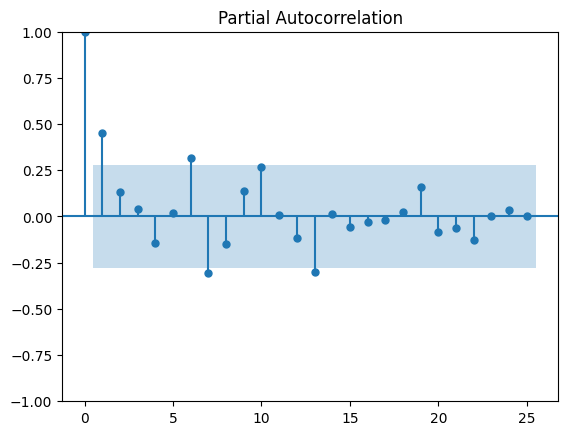

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residui.dropna(), lags=30)
plt.title("Autocorrelation of Residuals")
plt.show()
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(daily_insects.dropna(), lags=25)
plt.title('Partial Autocorrelation')
plt.show()


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Ljung-Box test on residuals
result = acorr_ljungbox(daily_insects.dropna(), lags=[7], return_df=True)
print(result)


     lb_stat  lb_pvalue
7  21.681699   0.002882


Weekly seasonality is statistically significant






In [ ]:
print(meteo_with_catture.columns)


Index(['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita', 'Date',
       'Numero_Insetti', 'Nuove_Catture'],
      dtype='object')


In [ ]:
print(meteo_with_catture['Numero_Insetti'].describe())
print(meteo_with_catture['Numero_Insetti'].value_counts())


count    1383.000000
mean        0.364425
std         0.636748
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: Numero_Insetti, dtype: float64
Numero_Insetti
0    975
1    336
2     48
3     24
Name: count, dtype: int64


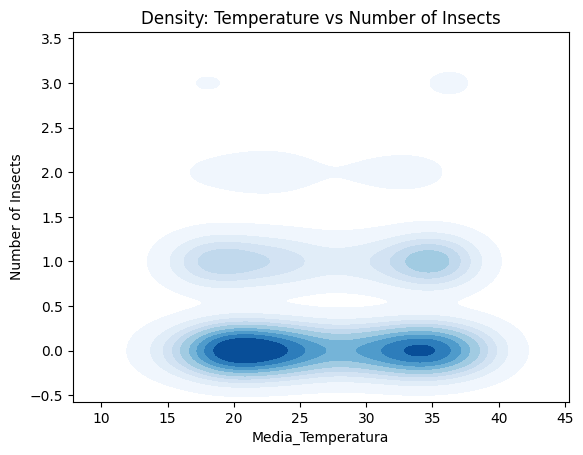

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.kdeplot(
    x=meteo_with_catture['Media_Temperatura'],
    y=meteo_with_catture['Numero_Insetti'],
    cmap="Blues", fill=True
)
plt.title('Density: Temperature vs Number of Insects')
plt.xlabel('Media_Temperatura')
plt.ylabel('Number of Insects')
plt.show()


In [ ]:
correlation = meteo_with_catture[['Media_Temperatura', 'Numero_Insetti']].corr()
print(correlation)

                   Media_Temperatura  Numero_Insetti
Media_Temperatura           1.000000        0.007735
Numero_Insetti              0.007735        1.000000


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)  # Degree 2 model
X_poly = poly.fit_transform(meteo_with_catture[['Media_Temperatura']])
model = LinearRegression()
model.fit(X_poly, meteo_with_catture['Numero_Insetti'])
print("Score:", model.score(X_poly, meteo_with_catture['Numero_Insetti']))


Score: 0.004370349928383921


In [ ]:
print(meteo_with_catture.dtypes)


Media_Temperatura           float64
Low_Temp                     object
High_Temp                    object
Media_Umidita                object
Date                 datetime64[ns]
Numero_Insetti                int64
Nuove_Catture                 int64
dtype: object


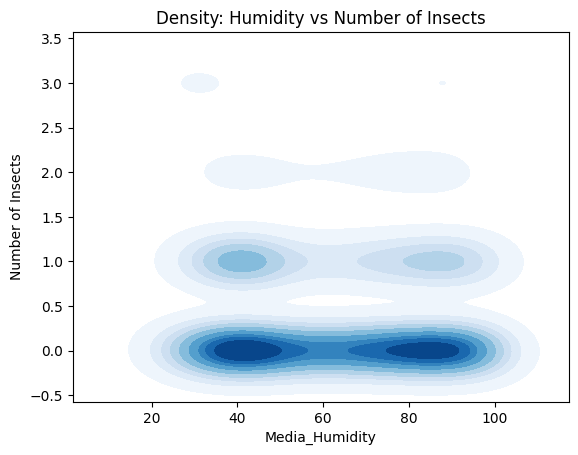

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

meteo_with_catture['Media_Umidita'] = meteo_with_catture['Media_Umidita'].str.replace(',', '.').astype(float)
meteo_with_catture['Numero_Insetti'] = meteo_with_catture['Numero_Insetti'].astype(float)


sns.kdeplot(
    x=meteo_with_catture['Media_Umidita'],
    y=meteo_with_catture['Numero_Insetti'],
    cmap="Blues", fill=True
)
plt.title('Density: Humidity vs Number of Insects')
plt.xlabel('Media_Humidity')
plt.ylabel('Number of Insects')
plt.show()

In [ ]:
correlation = meteo_with_catture[['Media_Umidita', 'Numero_Insetti']].corr()
print(correlation)

                Media_Umidita  Numero_Insetti
Media_Umidita        1.000000       -0.026595
Numero_Insetti      -0.026595        1.000000


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)  # Degree 2 model
X_poly = poly.fit_transform(meteo_with_catture[['Media_Umidita']])
model = LinearRegression()
model.fit(X_poly, meteo_with_catture['Numero_Insetti'])
print("Score:", model.score(X_poly, meteo_with_catture['Numero_Insetti']))

Score: 0.0019042785429508324




During the initial analysis, we found that there is no significant linear correlation between the climatic variables, such as the average temperature (Media_Temperatura) and the average humidity (Media_Umidita), and the number of insects captured (Numero_Insetti). This suggests that the relationships might be more complex and non-linear.

To verify this hypothesis, we decided to use polynomial regression, which allows modeling non-linear relationships by introducing polynomial terms (for example, the square of the temperature) without excessively increasing the complexity of the model. The objective was to explore if a polynomial model could better explain the relationship compared to a simple linear model.

In the case of temperature, the polynomial model produced an R² score of 0.0044, while for humidity, the score was 0.0019. These results indicate that, even including polynomial terms, the variability of the number of insects captured remains poorly explained by these climatic variables. Furthermore, the analysis confirms that the link between climatic variables and the number of insects is not significant, even from a non-linear perspective.

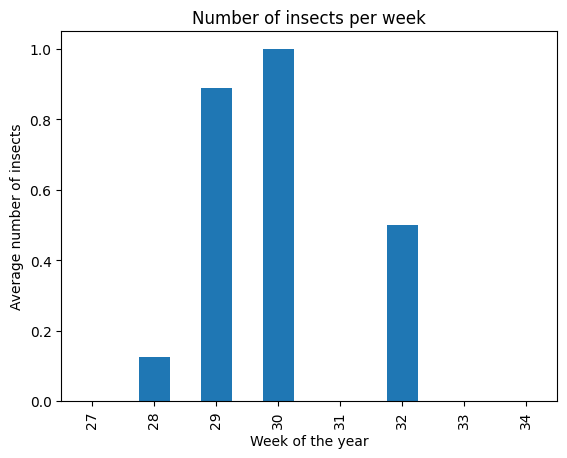

In [ ]:
# Assuming there is a column named 'Date' containing the dates
meteo_with_catture['Date'] = pd.to_datetime(meteo_with_catture['Date'])  # Convert the column to datetime format
meteo_with_catture.set_index('Date', inplace=True)  # Set 'Date' as the index

# Calculate the week of the year
meteo_with_catture['Week'] = meteo_with_catture.index.isocalendar().week

# Calculate the average number of insects per week
weekly_pattern = meteo_with_catture.groupby('Week')['Numero_Insetti'].mean()

# Plot
import matplotlib.pyplot as plt
weekly_pattern.plot(kind='bar', title='Number of insects per week')
plt.xlabel('Week of the year')
plt.ylabel('Average number of insects')
plt.show()


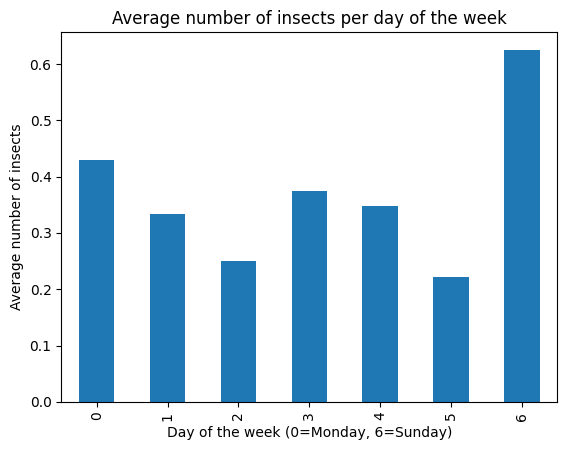

In [ ]:
 meteo_with_catture['Weekday'] = meteo_with_catture.index.dayofweek  # 0=Monday, 6=Sunday

# Calculate the average number of insects per day of the week
weekday_pattern = meteo_with_catture.groupby('Weekday')['Numero_Insetti'].mean()

# Plot
weekday_pattern.plot(kind='bar', title='Average number of insects per day of the week')
plt.xlabel('Day of the week (0=Monday, 6=Sunday)')
plt.ylabel('Average number of insects')
plt.show()

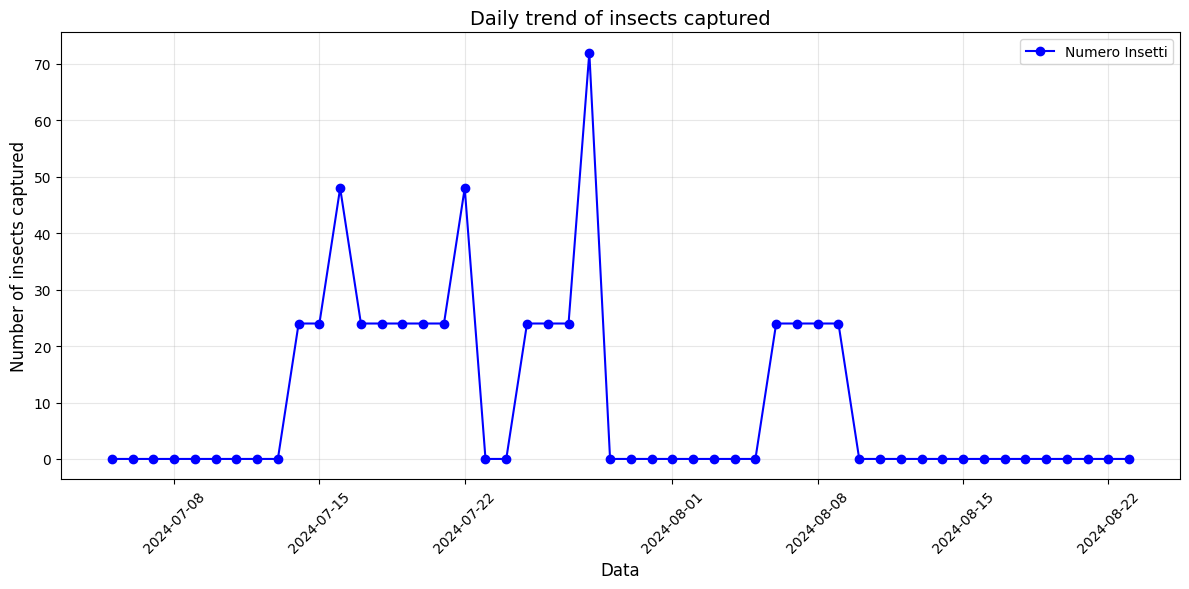

In [ ]:
import matplotlib.pyplot as plt

# Aggrega i dati per giorno
daily_counts = meteo_with_catture.resample('D')['Numero_Insetti'].sum()

# Grafico giornaliero
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-', color='blue', label='Numero Insetti')
plt.title("Daily trend of insects captured", fontsize=14)
plt.xlabel("Data", fontsize=12)
plt.ylabel("Number of insects captured", fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()




The first graph shows how the average number of insects captured varies based on the week of the year. Some interesting aspects are observed:

Weeks 29 and 30: These weeks have a significantly higher average number of insects compared to other weeks, with values around 200 insects. This indicates that during these weeks there were particularly favorable conditions for insect proliferation or increased efficiency in capture.
Weeks 27, 28, and 32: These weeks show lower values, with week 27 having an extremely reduced average number compared to the following weeks.
Week 31: This week does not show relevant data or could represent a significant drop. This weekly variability could be due to:
Environmental factors (e.g., weather, rain, temperature).
Operational factors (e.g., changes in traps, problems in detection).
Possible biological cycles specific to insects.
The second graph analyzes how the average number of insects captured varies between the days of the week:

Monday (0) and Sunday (6): These are the days with the highest average number of insects. Sunday, in particular, shows the maximum value, around 0.6 average insects.
Tuesday (2) and Saturday (5): These days have the lowest average values, suggesting a possible reduction in insect activity (or captures) on these days.
Interpretation:* This pattern could indicate:
A weekly periodicity in insect activity, influenced by environmental or behavioral factors.
Operational differences on the days when trap checks or maintenance are performed.
The third graph shows the trend of the number of insects captured on a daily basis:

Maximum peak on July 28th: It reaches over 70 insects, indicating an exceptional event or particularly favorable conditions.
Periods of reduction or zeroing:
From July 29th to August 3rd, there is a drastic drop, with days when the number of detected insects is close to 0.
This could be associated with a sudden change in environmental conditions (e.g., bad weather or excessively high/low temperatures).
Stability after August 3rd: A gradual recovery is observed with more stable values around 20 insects per day.


Interpretation:
The peak on July 28th and the subsequent drop require further investigation, for example, by analyzing weather conditions or any operational anomalies.
The recovery after August 3rd suggests a return to more favorable conditions or to normal operational procedures.


# ***Cluster***

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

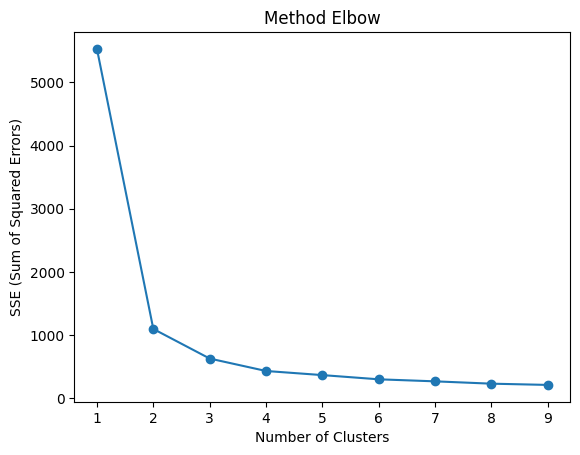

In [ ]:
# Select the relevant columns
features = meteo_with_catture[['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita']]

# Replace commas with dots in numeric values
features = features.replace(',', '.', regex=True).astype(float)

# Normalize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters with the Elbow method
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)

# Visualize the Elbow plot
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Method Elbow')
plt.show()

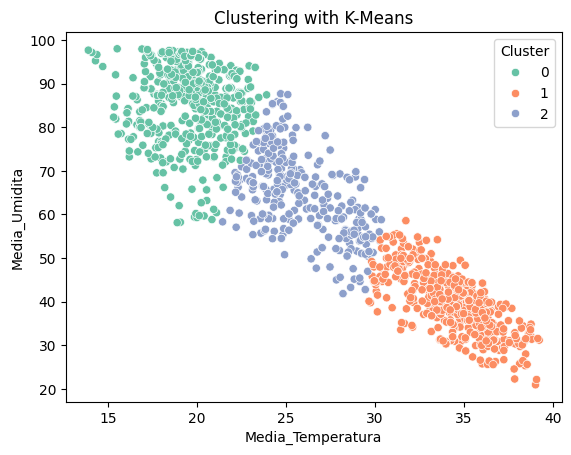

In [ ]:
# Apply K-Means with the chosen number of clusters
optimal_k = 3  # Sostituisci con il numero ottimale scelto
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add the clusters to the dataset
meteo_with_catture['Cluster'] = clusters
sns.scatterplot(data=meteo_with_catture, x='Media_Temperatura', y='Media_Umidita', hue='Cluster', palette='Set2')
plt.title('Clustering with K-Means')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(features_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.559015770078928


In [ ]:
import pandas as pd
from scipy.stats import f_oneway

#  Assuming the dataframe is named 'meteo_with_catture' and contains the fields:
# 'Cluster' -> Assigned clusters
# 'Numero_Insetti' -> Number of insects captured

# Step 2: Mean and standard deviation per cluster
cluster_stats = meteo_with_catture.groupby('Cluster')['Numero_Insetti'].agg(['mean', 'std', 'count'])
print(cluster_stats)

# Punto 3: ANOVA
# Separate the data based on clusters
cluster_0 = meteo_with_catture[meteo_with_catture['Cluster'] == 0]['Numero_Insetti']
cluster_1 = meteo_with_catture[meteo_with_catture['Cluster'] == 1]['Numero_Insetti']
cluster_2 = meteo_with_catture[meteo_with_catture['Cluster'] == 2]['Numero_Insetti']

# Perform ANOVA
anova_result = f_oneway(cluster_0, cluster_1, cluster_2)
print('ANOVA F-statistic:', anova_result.statistic)
print('ANOVA p-value:', anova_result.pvalue)


             mean       std  count
Cluster                           
0        0.369863  0.640306    511
1        0.392265  0.653471    543
2        0.310030  0.600754    329
ANOVA F-statistic: 1.7399541794284246
ANOVA p-value: 0.17591329225264535


To better analyze the relationship between climatic conditions and the presence of insects, we decided to apply the K-Means clustering model. This choice was motivated by the need to segment the data into homogeneous groups, using the main relevant climatic variables as a basis: Media_Temperatura, Low_Temp, High_Temp, and Media_Umidita. The objective was to identify recurring patterns or distinct groups of environmental conditions that could potentially influence insect behavior.

To determine the optimal number of clusters, we used the Elbow Method, which highlighted a clear "elbow point" for k = 3. This suggests that dividing the data into three clusters represents a good compromise between model simplicity and the ability to capture the main characteristics of the climate data. Once the model was applied with k = 3, we obtained a Silhouette Score of 0.559, a value that indicates good cluster definition. In particular, the groups show moderate separation and internal cohesion, with a slight overlap that does not compromise the robustness of the segmentation.

The resulting graph clearly shows that the clusters are mainly distributed along the Media_Temperatura axis, suggesting that temperature is the predominant factor in the segmentation. Humidity, while having an influence, plays a less evident role, showing relatively less variability between clusters.

This segmentation allowed us to identify three distinct clusters:

Cluster 0 (green): Characterized by low temperatures and high humidity, typical of cool and humid environments.
Cluster 1 (orange): Distinguished by high temperatures and low humidity, representing hot and dry conditions.
Cluster 2 (blue): Located in moderate conditions, with average temperatures and intermediate humidity.
However, it is important to emphasize that, despite the clustering showing well-defined climatic groups, previous analyses have shown that there is no significant correlation between climatic conditions and the number of insects captured. Consequently, the climatic clusters do not seem to directly influence the presence of insects, suggesting that other factors, not included in the dataset, could play a more decisive role.



The means of the number of insects captured for the three climatic clusters are similar:

Cluster 0: 0.37
Cluster 1: 0.39
Cluster 2: 0.31
This similarity suggests that the climate, represented by the clusters, does not seem to have a strong differentiating effect on the average number of insects captured.

ANOVA Test:

The p-value of 0.18 indicates that there is no statistically significant evidence to support the claim that the climatic clusters influence the number of insects captured. The observed differences between the means could be due to chance.

Cluster
0    0.369863
1    0.392265
2    0.310030
Name: Numero_Insetti, dtype: float64


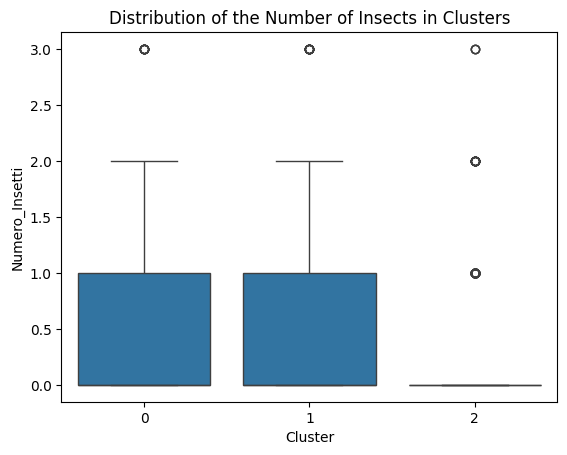

In [ ]:
cluster_insect_means = meteo_with_catture.groupby('Cluster')['Numero_Insetti'].mean()
print(cluster_insect_means)
sns.boxplot(data=meteo_with_catture, x='Cluster', y='Numero_Insetti')
plt.title('Distribution of the Number of Insects in Clusters')
plt.show()

In [ ]:
from scipy.stats import f_oneway
f_stat, p_value = f_oneway(
    meteo_with_catture[meteo_with_catture['Cluster'] == 0]['Numero_Insetti'],
    meteo_with_catture[meteo_with_catture['Cluster'] == 1]['Numero_Insetti'],
    meteo_with_catture[meteo_with_catture['Cluster'] == 2]['Numero_Insetti']
)
print(f"F-statistic: {f_stat}, P-value: {p_value}")


F-statistic: 1.7399541794284246, P-value: 0.17591329225264535


The results of the ANOVA further confirm that there is no significant relationship between climatic conditions (represented by the clusters) and the number of insects captured. Although the climatic clusters are well-distinguished in terms of temperature and humidity, these factors do not seem to directly influence the number of insects detected.

In [ ]:
# Importing libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepara the dataset
# Replace 'meteo_with_catture' with the name of the DataFrame
X = meteo_with_catture[['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita', 'Cluster']]
y = meteo_with_catture['Numero_Insetti']

# Convert any strings with commas to float numbers
X = X.replace(',', '.', regex=True).astype(float)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using standardization"
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Make predictions
rf_pred = rf.predict(X_test_scaled)

# Evaluate the performance
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred)) # Calculate RMSE using numpy
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest Regressor Performance:")
print(f"MAE: {rf_mae}")
print(f"RMSE: {rf_rmse}")
print(f"R²: {rf_r2}")


Random Forest Regressor Performance:
MAE: 0.4943811242908716
RMSE: 0.6953538265726854
R²: -0.2731561978756092


SARIMA Performance:
MAE: 5.9081535611100735
RMSE: 7.2506722328585225


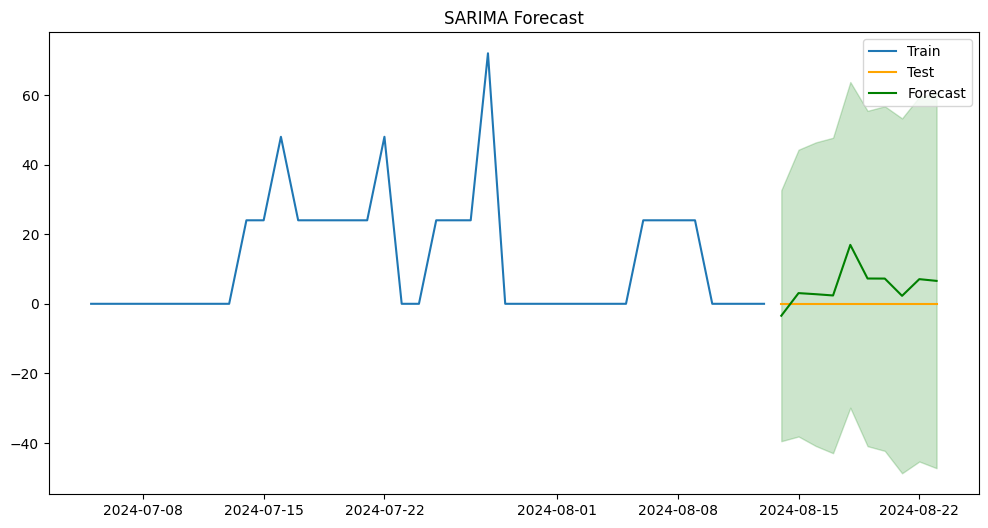

In [ ]:
# Importing libraries
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Aggregate the data on a daily basis
daily_insects = meteo_with_catture['Numero_Insetti'].resample('D').sum()

# Split the data into training and test sets
train_size = int(len(daily_insects) * 0.8)
train, test = daily_insects[:train_size], daily_insects[train_size:]

# Create the SARIMA model
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))  # Modifica i parametri in base ai tuoi dati
sarima = model.fit(disp=False)

# Make predictions on the test set
forecast = sarima.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Calculate the metrics
mae = mean_absolute_error(test, forecast_mean)

# Calculate RMSE without the 'squared' parameter, and then take the square root
rmse = np.sqrt(mean_squared_error(test, forecast_mean))
print(f"SARIMA Performance:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='orange')
plt.plot(forecast_mean, label='Forecast', color='green')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='green', alpha=0.2)
plt.title('SARIMA Forecast')
plt.legend()
plt.show()


In [ ]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd


# Select the features and the target
X = meteo_with_catture[['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita']]
y = meteo_with_catture['Numero_Insetti']

# Convert strings containing commas to floats
X = X.replace(',', '.', regex=True).astype(float)

# Transform the target into a binary variable: 'Many' and 'Few'
threshold = 2  # Threshold for classifying 'Many' and 'Few' insects
y = y.apply(lambda x: "Many" if x >= threshold else "Few")

# Split the data into training and test sets, with stratification to balance the classes
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Random Forest Classifier model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Make predictions
clf_pred = clf.predict(X_test_scaled)

# Evaluate the performance
accuracy = accuracy_score(y_test, clf_pred)
classification_rep = classification_report(y_test, clf_pred, target_names=["Few", "Many"])
conf_matrix = confusion_matrix(y_test, clf_pred, labels=["Few", "Many"])

# Print the results
print(f"Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)




Random Forest Classifier Performance:
Accuracy: 0.927797833935018
Classification Report:
              precision    recall  f1-score   support

         Few       0.95      0.98      0.96       263
        Many       0.00      0.00      0.00        14

    accuracy                           0.93       277
   macro avg       0.47      0.49      0.48       277
weighted avg       0.90      0.93      0.91       277

Confusion Matrix:
[[257   6]
 [ 14   0]]


## Random forest Cicalino 2


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd


# Load your dataset
data = pd.read_csv("/content/meteo_with_catture.csv")

# Convert the target variable (Numero_Insetti) to a classification problem
# Create a binary target: 0 (no insects) vs 1 (presence of insects)
data['Numero_Insetti_Class'] = (data['Numero_Insetti'] > 0).astype(int)

# Replace commas with dots in all relevant columns and convert to float
columns_to_clean = ['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita']
for col in columns_to_clean:
    data[col] = data[col].astype(str).str.replace(',', '.').astype(float)


# Define features (X) and the new target (y_class)
X_class = data[['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita']]
y_class = data['Numero_Insetti_Class']

# Split the data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

# Initialize and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier.fit(X_train_class, y_train_class)

# Make predictions
y_pred_class = rf_classifier.predict(X_test_class)

# Evaluate the classifier
classification_rep = classification_report(y_test_class, y_pred_class)

from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report as a dictionary
classification_rep_dict = classification_report(y_test_class, y_pred_class, output_dict=True)

# Convert the dictionary to a pandas DataFrame
classification_df = pd.DataFrame(classification_rep_dict).transpose()

# Round the values for better readability
classification_df = classification_df.round(2)

# Print the classification report as a formatted table
print(classification_df)


              precision  recall  f1-score  support
0                  0.69    0.85      0.76   188.00
1                  0.38    0.19      0.25    89.00
accuracy           0.64    0.64      0.64     0.64
macro avg          0.53    0.52      0.51   277.00
weighted avg       0.59    0.64      0.60   277.00


We used a Random Forest model to classify the presence of insects based on climatic data. After preprocessing the data (transforming the target variable into a binary one: 0 = no insects, 1 = presence of insects), we trained the model on a dataset split into 80% for training and 20% for testing.

The model predicts cases without insects (class 0) well, but struggles to recognize those with insects (class 1).

The high accuracy is misleading because it reflects the model's ability to correctly predict the dominant class (no insects), ignoring the minority class (presence of insects). This indicates a problem of dataset imbalance, which leads to poor generalization for the less represented class.

# Regressione Cicalino 2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/content/meteo_with_catture.csv'
data = pd.read_csv(file_path)

# Preprocess: Replace commas with dots and convert numeric columns to float
columns_to_clean = ['Low_Temp', 'High_Temp', 'Media_Umidita']
for col in columns_to_clean:
    data[col] = data[col].astype(str).str.replace(',', '.').astype(float)

# Define features (X) and target (y)
X = data[['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita']]
y = data['Numero_Insetti']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Print evaluation metrics
print("### Regression Results ###")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


### Regression Results ###
Mean Squared Error (MSE): 0.3827
R-squared (R²): -0.0078


The applied linear regression is not effective in predicting the number of insects captured, as evidenced by the negative R-squared and the moderate error (MSE). The model fails to capture significant patterns in the data, likely due to a non-linear relationship between the climatic variables and the target variable. It is necessary to further analyze the data and consider more advanced models to improve predictions.

# EDA Imola 1

In [ ]:
import pandas as pd

# CSV file paths
file_meteo_csv = '/content/dati-meteo-storici (Imola 1).csv'
file_catture_csv = '/content/grafico_delle_catture_(Imola 1).csv'

# Read the CSV files with the correct separator and skip unnecessary rows
meteo_df = pd.read_csv(
    file_meteo_csv, sep=',', skiprows=2,
    names=['DateTime', 'Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita'],
    skipinitialspace=True
)

catture_df = pd.read_csv(
    file_catture_csv, sep=',', skiprows=2,
    names=['DateTime', 'Numero_Insetti', 'Nuove_Catture', 'Recensito', 'Evento'],
    skipinitialspace=True
)

# Data Cleaning
meteo_df = meteo_df[1:]  # Removes an initial metadata row
catture_df = catture_df[2:]  # Removes metadata rows

# Data transformations and preparation
meteo_df['Media_Temperatura'] = (
    meteo_df['Media_Temperatura']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

meteo_df['DateTime'] = pd.to_datetime(meteo_df['DateTime'], format='%d.%m.%Y %H:%M:%S', errors='coerce')
catture_df['DateTime'] = pd.to_datetime(catture_df['DateTime'], format='%d.%m.%Y %H:%M:%S', errors='coerce')

meteo_df['Date'] = meteo_df['DateTime'].dt.date
catture_df['Date'] = catture_df['DateTime'].dt.date

catture_df['Numero_Insetti'] = catture_df['Numero_Insetti'].fillna(0).astype(int)
catture_per_day = catture_df.groupby('Date', as_index=False)['Numero_Insetti'].sum()

meteo_with_catture_imola1 = pd.merge(meteo_df, catture_per_day, on='Date', how='left')
meteo_with_catture_imola1['Numero_Insetti'] = meteo_with_catture_imola1['Numero_Insetti'].fillna(0).astype(int)

# We save the result
meteo_with_catture_imola1.to_csv('meteo_with_catture_imola1.csv', index=False)

print(meteo_with_catture_imola1)

               DateTime  Media_Temperatura Low_Temp High_Temp Media_Umidita  \
0   2024-07-30 12:00:00              34.98     34,8      35,1         35,38   
1   2024-07-30 13:00:00              35.08     34,8      35,3         33,89   
2   2024-07-30 14:00:00              35.14     34,8      35,5         33,49   
3   2024-07-30 15:00:00              34.40     33,9      34,8         35,22   
4   2024-07-30 16:00:00              33.11     32,6        34          35,3   
..                  ...                ...      ...       ...           ...   
559 2024-08-22 20:00:00              27.31     26,7      28,1         67,38   
560 2024-08-22 21:00:00              25.72     24,9      26,6         74,55   
561 2024-08-22 22:00:00              24.27     23,9      24,8         81,39   
562 2024-08-22 23:00:00              23.61     23,4      23,9         86,22   
563 2024-08-23 00:00:00              23.26     23,1      23,4          88,6   

           Date  Numero_Insetti  
0    2024-07-30  

In [ ]:
import pandas as pd
meteo_with_catture=pd.read_csv("/content/meteo_with_catture_imola1.csv")

In [ ]:
print(meteo_with_catture)

                DateTime  Media_Temperatura Low_Temp High_Temp Media_Umidita  \
0    2024-07-30 12:00:00              34.98     34,8      35,1         35,38   
1    2024-07-30 13:00:00              35.08     34,8      35,3         33,89   
2    2024-07-30 14:00:00              35.14     34,8      35,5         33,49   
3    2024-07-30 15:00:00              34.40     33,9      34,8         35,22   
4    2024-07-30 16:00:00              33.11     32,6        34          35,3   
..                   ...                ...      ...       ...           ...   
559  2024-08-22 20:00:00              27.31     26,7      28,1         67,38   
560  2024-08-22 21:00:00              25.72     24,9      26,6         74,55   
561  2024-08-22 22:00:00              24.27     23,9      24,8         81,39   
562  2024-08-22 23:00:00              23.61     23,4      23,9         86,22   
563  2024-08-23 00:00:00              23.26     23,1      23,4          88,6   

           Date  Numero_Insetti  
0    

In [ ]:
print(type(meteo_with_catture.index))

<class 'pandas.core.indexes.range.RangeIndex'>


In [ ]:
print(meteo_with_catture.describe())

       Media_Temperatura  Numero_Insetti
count         564.000000      564.000000
mean           27.548936        0.519504
std             5.607029        1.180650
min            17.860000        0.000000
25%            22.897500        0.000000
50%            26.020000        0.000000
75%            32.565000        0.000000
max            39.820000        5.000000


<Axes: >

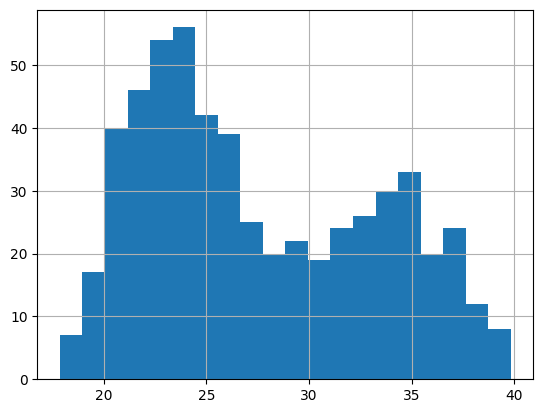

In [ ]:
meteo_with_catture['Media_Temperatura'].hist(bins=20)

<Axes: >

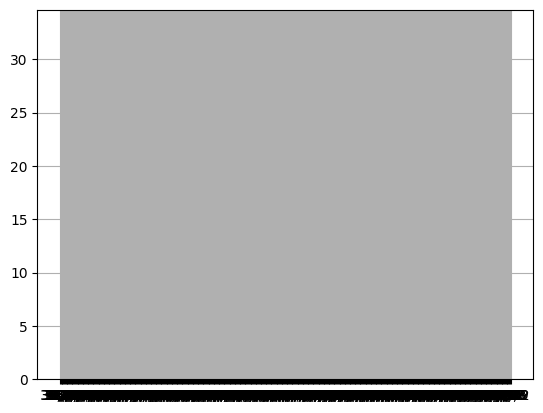

In [ ]:
meteo_with_catture['Media_Umidita'].hist(bins=20)

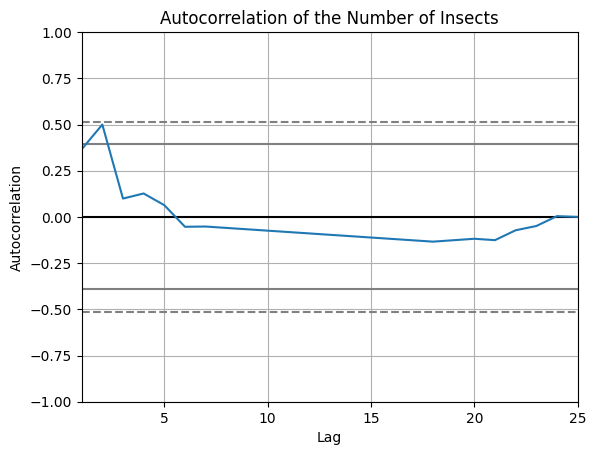

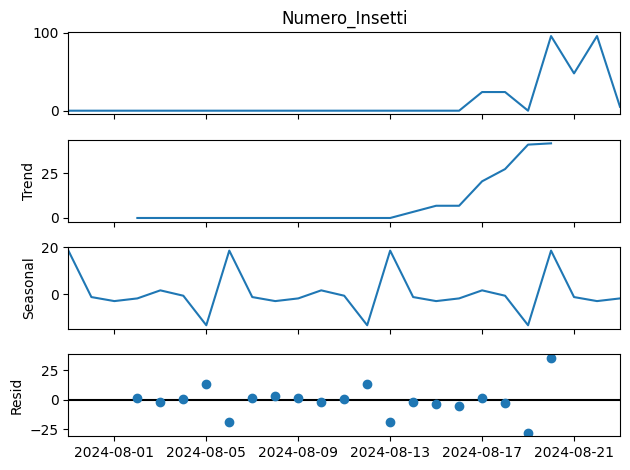

In [ ]:

from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
meteo_with_catture['Date'] = pd.to_datetime(meteo_with_catture['Date'])
daily_insects = meteo_with_catture.set_index('Date')['Numero_Insetti'].resample('D').sum()

autocorrelation_plot(daily_insects)
plt.title('Autocorrelation of the Number of Insects')
plt.show()

decomposition = seasonal_decompose(daily_insects, model='additive', period=7)
decomposition.plot()
plt.show()

The autocorrelation plot shows the temporal dependence in the insect count. In the first few lags (up to about 5), a significant positive correlation is observed, indicating that the number of insects on a given day might be correlated with the immediately preceding days. However, as the lag increases, the autocorrelation rapidly approaches zero, suggesting that the influence of past values diminishes over time. There are no clear signs of periodicity.

The seasonal decomposition of the insect count reveals three main components:

Trend: Represents an increasing trend in the number of insects towards the end of the period, indicating a gradual increase.
Seasonal: Highlights a weekly cyclical behavior, with regular, repeating variations. This could be due to environmental or seasonal factors.
Residual: The errors or residuals appear to be distributed around zero, but some fluctuations might indicate specific events or anomalies not captured by the model.
This analysis confirms the presence of a seasonal component and an underlying trend in the dataset.

# # Residual Analysis (Imola)

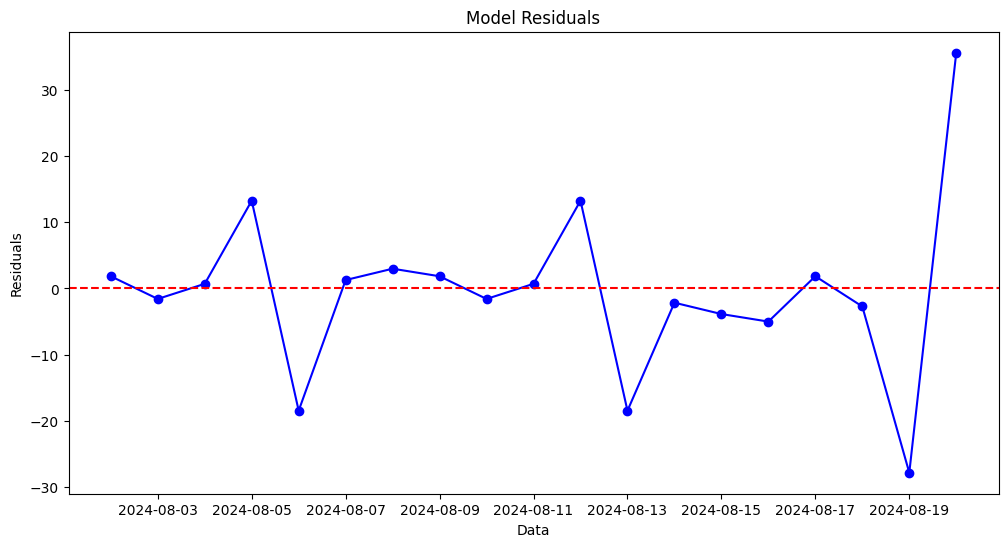

In [ ]:
# Extract the residuals from the decomposition
residui = decomposition.resid

# Visualize the residuals
plt.figure(figsize=(12, 6))
plt.plot(residui, marker='o', linestyle='-', color='b')
plt.axhline(0, color='red', linestyle='--')
plt.title("Model Residuals")
plt.xlabel("Data")
plt.ylabel("Residuals")
plt.show()

The graph represents the residuals of the seasonal decomposition model. These residuals are what remains after removing the trend and seasonal component from the total number of insects.

The dashed red line represents zero, which is the expected value of the residuals in the absence of anomalies. Most of the residuals fluctuate around zero, indicating that the model captures most of the data's behavior well. However, there are some notable peaks (for example, on 2024-08-19), which could represent anomalous events or measurement errors. These larger residuals suggest that there are dynamics not explained by the model and which could be the subject of further analysis. In summary, the model is effective but does not fully capture some extreme variations, which deserve further investigation.

In [ ]:
import seaborn as sns
# Threshold Calculation
soglia = 3 * residui.std()  # 3 standard deviations
unusual_events = residui[abs(residui) > soglia]

# Display the days with unusual events
print("Exceptional events in the residuals:")
print(unusual_events)

Exceptional events in the residuals:
Series([], Freq: D, Name: resid, dtype: float64)


In [ ]:
# Converts 'DateTime' to datetime and sets it as the index
meteo_with_catture['DateTime'] = pd.to_datetime(meteo_with_catture['DateTime'])
meteo_with_catture.set_index('DateTime', inplace=True)

In [ ]:
# Extract the data for July 28, 2024
evento_25_agosto = meteo_with_catture.loc['2024-08-23']
#print(evento_28_july[['Media_Temperatura', 'Media_Umidita', 'Numero_Insetti']])

In [ ]:
# Comparison with nearby days
comparison_days = meteo_with_catture.loc['2024-08-19':'2024-08-23']
print(comparison_days[['Media_Temperatura', 'Media_Umidita', 'Numero_Insetti']])

                     Media_Temperatura Media_Umidita  Numero_Insetti
DateTime                                                            
2024-08-19 00:00:00              22.02         72,62               0
2024-08-19 01:00:00              21.45         75,35               0
2024-08-19 02:00:00              20.80         77,85               0
2024-08-19 03:00:00              20.58         78,64               0
2024-08-19 04:00:00              20.60          79,4               0
...                                ...           ...             ...
2024-08-22 20:00:00              27.31         67,38               4
2024-08-22 21:00:00              25.72         74,55               4
2024-08-22 22:00:00              24.27         81,39               4
2024-08-22 23:00:00              23.61         86,22               4
2024-08-23 00:00:00              23.26          88,6               5

[97 rows x 3 columns]


In [ ]:
print(comparison_days[20:40])

                     Media_Temperatura Low_Temp High_Temp Media_Umidita  \
DateTime                                                                  
2024-08-19 20:00:00              22.51     21,8      23,4         86,99   
2024-08-19 21:00:00              21.65     21,6      21,7         94,23   
2024-08-19 22:00:00              21.62     21,5      21,7         94,63   
2024-08-19 23:00:00              21.05     20,8      21,4         95,55   
2024-08-20 00:00:00              20.85     20,8      21,1         95,74   
2024-08-20 01:00:00              20.79     20,7      20,9          96,3   
2024-08-20 02:00:00              20.59     20,5      20,6            98   
2024-08-20 03:00:00              20.54     20,4      20,7         97,81   
2024-08-20 04:00:00              20.66     20,6      20,7         96,11   
2024-08-20 05:00:00              20.62     20,5      20,7         97,15   
2024-08-20 06:00:00              20.46     20,4      20,5         98,25   
2024-08-20 07:00:00      

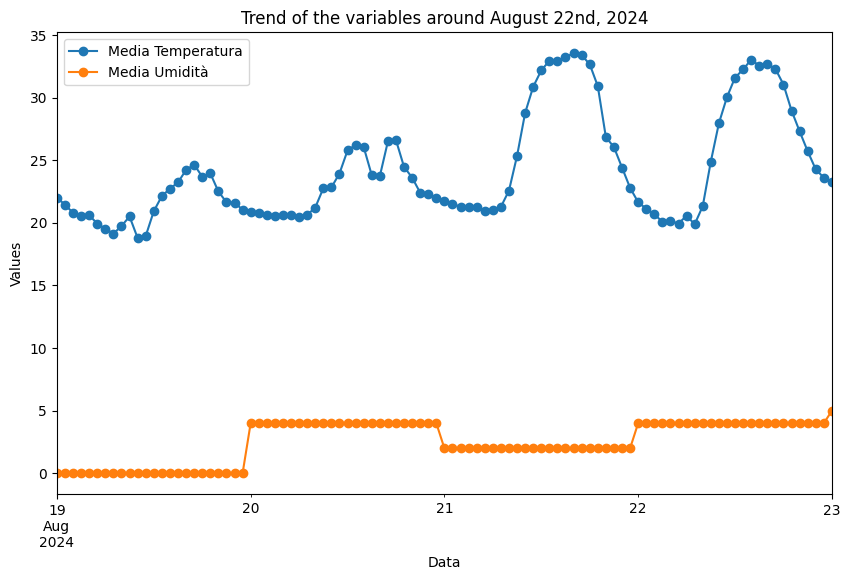

In [ ]:
# Plot of climatic variables around August 22nd
comparison_days[['Media_Temperatura', 'Media_Umidita', 'Numero_Insetti']].plot(
    figsize=(10, 6), marker='o')
plt.title("Trend of the variables around August 22nd, 2024")
plt.xlabel("Data")
plt.ylabel("Values")
plt.legend(["Media Temperatura", "Media Umidità", "Numero Insetti"])
plt.show()

The graph shows the trend of two main climatic variables, Average Temperature and Average Humidity, during the period from August 19th to August 23rd, 2024.

Average Temperature (blue line):

Significant variations are observed with regular peaks and drops, likely related to the day-night cycle. The maximum values reach around 35°C, while the minimum values drop to around 20°C.

Average Humidity (orange line):

The average humidity remains almost constant at low values until August 20th, with a sudden increase followed by a stable plateau. This behavior suggests a possible weather event (e.g., rain or atmospheric changes) that might have influenced the recorded values.

General observation: The relationship between temperature and humidity could provide useful clues about the potential impact on the Number of Insects (not represented here). A correlation analysis could further explore the relationship between these variables.

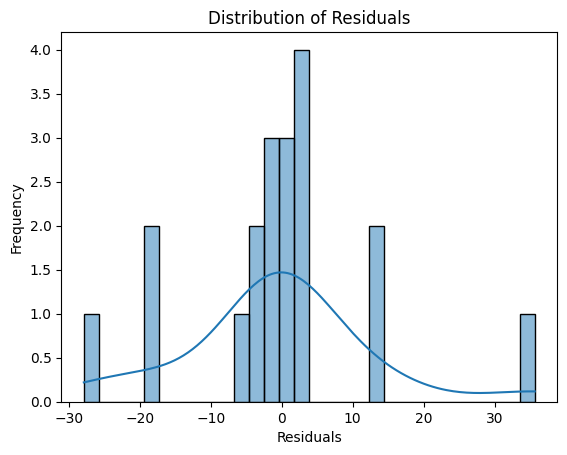

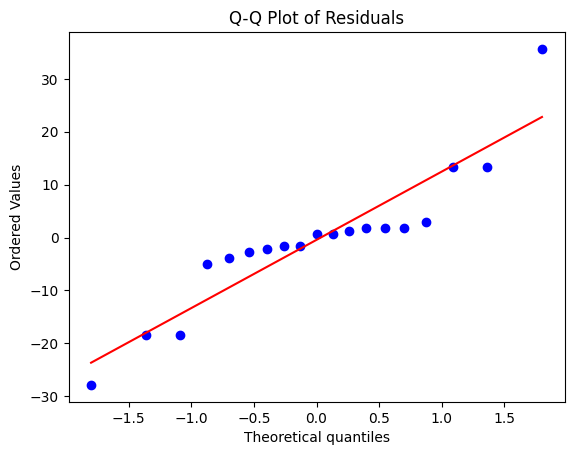

In [ ]:
import seaborn as sns
from scipy.stats import probplot

# Histogram of residuals
sns.histplot(residui.dropna(), kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Q-Q Plot
probplot(residui.dropna(), dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

The distribution is concentrated around zero, as expected in a well-calibrated model. However, the residuals show a slight asymmetry, with noticeable tails towards positive and negative extremes. This could indicate the presence of outliers or dynamics not captured by the model. The superimposed density curve helps visualize the overall trend of the distribution, which seems to approach a normal distribution, but not perfectly.

The Q-Q plot compares the quantiles of the residuals with the theoretical quantiles of a normal distribution.

Main observations: The points follow the red line (45 degrees) in the center, indicating that the residuals have a normal distribution in the central part. At the extremes, however, the points deviate significantly from the line, indicating deviations from normality. This suggests that there are outliers or residuals that do not follow the expected normal distribution.

Although most of the residuals are close to zero and approximate a normal distribution, the presence of tails and outliers requires attention. It might be useful to further investigate the events associated with the most extreme residuals.

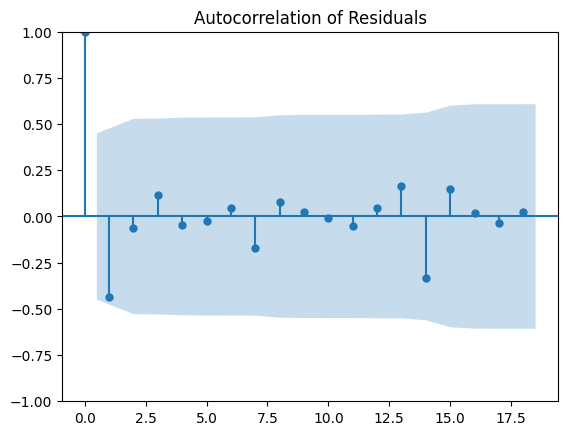

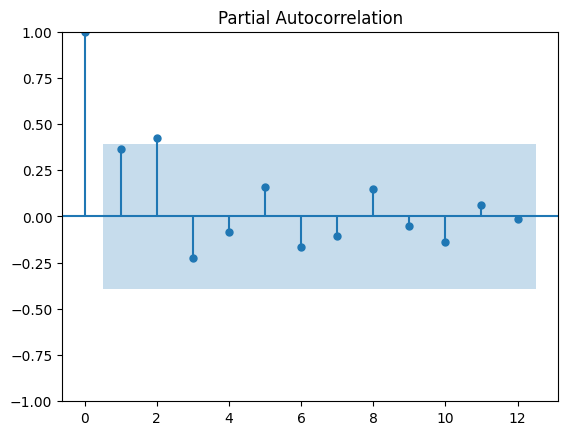

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residui.dropna(), lags=18)
plt.title("Autocorrelation of Residuals")
plt.show()
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(daily_insects.dropna(), lags=12)
plt.title('Partial Autocorrelation')
plt.show()

The graph represents the autocorrelation of the residuals up to a lag of 18.

Main observations: At lag 0, the autocorrelation is 1, as expected (each data point is perfectly correlated with itself). All other lags are contained within the confidence interval (shaded area), suggesting that the residuals are essentially uncorrelated over time. This result indicates that the model has captured the temporal structure of the data well, leaving residuals that behave like white noise.

The PACF shows the partial correlation of the daily insect values, isolating the effect of intermediate lags.

Main observations: The first two lags (1 and 2) show significant partial correlation, suggesting that the number of insects on a given day depends closely on the two preceding days. After lag 2, the partial correlations decrease rapidly and fall within the confidence interval, indicating that values further back in time do not have a significant direct influence.

The autocorrelation of the residuals confirms the effectiveness of the model in eliminating temporal dependencies, while the PACF reveals a significant short-term relationship in the number of insects, suggesting an AR(2) structure as a possible component for a future model.

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Ljung-Box test on residuals
result = acorr_ljungbox(daily_insects.dropna(), lags=[7], return_df=True)
print(result)

     lb_stat  lb_pvalue
7  12.251922   0.092573


In [ ]:
print(meteo_with_catture.columns)

Index(['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita', 'Date',
       'Numero_Insetti'],
      dtype='object')


In [ ]:
print(meteo_with_catture['Numero_Insetti'].describe())
print(meteo_with_catture['Numero_Insetti'].value_counts())

count    564.000000
mean       0.519504
std        1.180650
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Name: Numero_Insetti, dtype: float64
Numero_Insetti
0    443
1     48
4     48
2     24
5      1
Name: count, dtype: int64


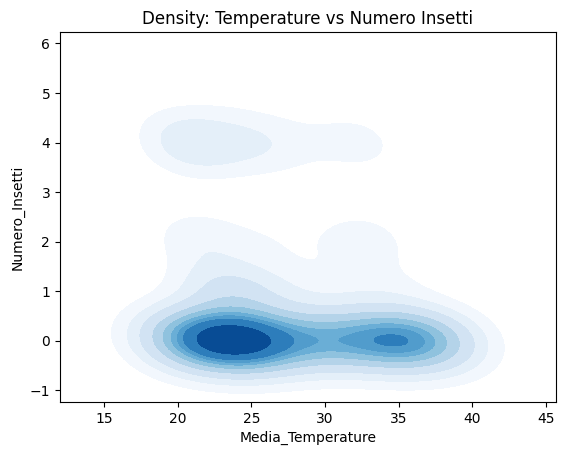

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.kdeplot(
    x=meteo_with_catture['Media_Temperatura'],
    y=meteo_with_catture['Numero_Insetti'],
    cmap="Blues", fill=True
)
plt.title('Density: Temperature vs Numero Insetti')
plt.xlabel('Media_Temperature')
plt.ylabel('Numero_Insetti')
plt.show()




The highest density is concentrated around average temperatures between 20°C and 25°C with a Number of Insects close to zero. Another density area (less pronounced) is observed at temperatures above 30°C, again with a Number of Insects close to zero. The upper area (Number of Insects > 3) shows a very low density, suggesting that events with a high number of insects are rare and might be associated with particular conditions.

The relationship between temperature and the number of insects appears to be non-linear: while the density is concentrated at moderate temperatures, an increase in temperature does not correspond to a significant increase in the number of insects. There might be other variables (e.g., humidity or seasonal events) that influence the Number of Insects, in addition to temperature.

In [ ]:
correlation = meteo_with_catture[['Media_Temperatura', 'Numero_Insetti']].corr()
print(correlation)

                   Media_Temperatura  Numero_Insetti
Media_Temperatura           1.000000       -0.195083
Numero_Insetti             -0.195083        1.000000


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)  # Degree 2 model
X_poly = poly.fit_transform(meteo_with_catture[['Media_Temperatura']])
model = LinearRegression()
model.fit(X_poly, meteo_with_catture['Numero_Insetti'])
print("Score:", model.score(X_poly, meteo_with_catture['Numero_Insetti']))

Score: 0.03833697169516237


In [ ]:
print(meteo_with_catture.dtypes)

Media_Temperatura           float64
Low_Temp                     object
High_Temp                    object
Media_Umidita                object
Date                 datetime64[ns]
Numero_Insetti                int64
dtype: object


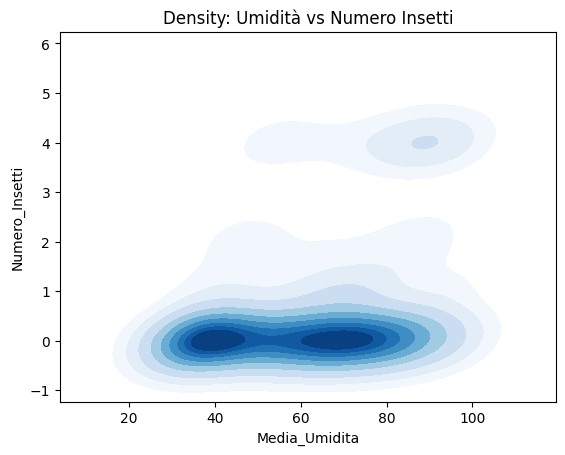

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

meteo_with_catture['Media_Umidita'] = meteo_with_catture['Media_Umidita'].str.replace(',', '.').astype(float)
meteo_with_catture['Numero_Insetti'] = meteo_with_catture['Numero_Insetti'].astype(float)


sns.kdeplot(
    x=meteo_with_catture['Media_Umidita'],
    y=meteo_with_catture['Numero_Insetti'],
    cmap="Blues", fill=True
)
plt.title('Density: Umidità vs Numero Insetti')
plt.xlabel('Media_Umidita')
plt.ylabel('Numero_Insetti')
plt.show()



The highest density is concentrated at humidity values between 40% and 70% with a Number of Insects close to zero. This suggests that most of the data falls within these climatic conditions, but with few insects present. There is a second, less intense density region for humidity above 90%, which could indicate particular conditions associated with a slight increase in the Number of Insects. The area with a high number of insects (> 3) has a very low density, highlighting that such events are rare and not strictly linked to a specific humidity range.

The Number of Insects does not appear to have a direct linear relationship with humidity. The concentration near zero suggests that other factors might be necessary to explain significant variations in the Number of Insects. However, it is evident that extremely low (< 30%) or extremely high (> 90%) humidity values seem to be associated with a reduced variation in the Number of Insects.

The relationship between Average Humidity and Number of Insects is complex and not evident. It might be useful to include more environmental or climatic variables (such as temperature) to build a more predictive and relevant model.

In [ ]:
correlation = meteo_with_catture[['Media_Umidita', 'Numero_Insetti']].corr()
print(correlation)

                Media_Umidita  Numero_Insetti
Media_Umidita         1.00000         0.32592
Numero_Insetti        0.32592         1.00000


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)  # Degree 2 model
X_poly = poly.fit_transform(meteo_with_catture[['Media_Umidita']])
model = LinearRegression()
model.fit(X_poly, meteo_with_catture['Numero_Insetti'])
print("Score:", model.score(X_poly, meteo_with_catture['Numero_Insetti']))

Score: 0.12643614695062388


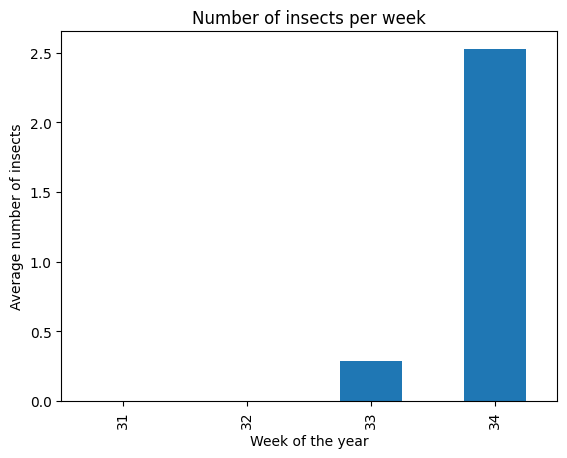

In [ ]:
# Assuming there is a column named 'Date' containing the dates
meteo_with_catture['Date'] = pd.to_datetime(meteo_with_catture['Date'])  # Convert the column to datetime format
meteo_with_catture.set_index('Date', inplace=True)  # Set 'Date' as the index

# Calculate the week of the year
meteo_with_catture['Week'] = meteo_with_catture.index.isocalendar().week

# Calculate the average number of insects per week
weekly_pattern = meteo_with_catture.groupby('Week')['Numero_Insetti'].mean()

# Plot
import matplotlib.pyplot as plt
weekly_pattern.plot(kind='bar', title='Number of insects per week')
plt.xlabel('Week of the year')
plt.ylabel('Average number of insects')
plt.show()


During weeks 31 and 32, the average number of insects is almost zero. There is a significant increase starting from week 33, with a maximum peak in week 34, where the average number of insects reaches a value above 2.5.

This weekly pattern could be linked to seasonal or environmental factors that favor the growth or capture of insects in week 34. The absence of insects in the first weeks (31 and 32) might indicate unfavorable climatic or biological conditions during that period.

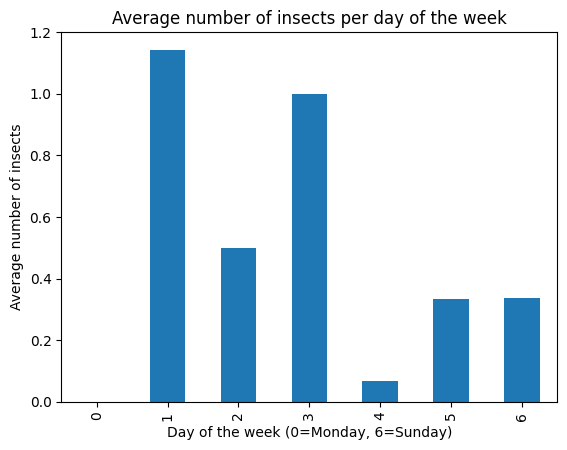

In [ ]:
meteo_with_catture['Weekday'] = meteo_with_catture.index.dayofweek  # 0=Monday, 6=Sunday

# Calculate the average number of insects per day of the week
weekday_pattern = meteo_with_catture.groupby('Weekday')['Numero_Insetti'].mean()

# Plot
weekday_pattern.plot(kind='bar', title='Average number of insects per day of the week')
plt.xlabel('Day of the week (0=Monday, 6=Sunday)')
plt.ylabel('Average number of insects')
plt.show()

The maximum peak occurs on Tuesday (1), with an average number of insects of about 1.2. Monday (0) also shows high values compared to other days. Wednesday (2) exhibits a significant decrease compared to the first two days, while Thursday (3) registers the minimum value. On weekend days (Saturday (5) and Sunday (6)), the average number of insects rises slightly but remains low compared to the beginning of the week.

The data distribution might be influenced by activities related to monitoring or environmental conditions specific to the first days of the week. The fluctuation could also indicate cyclical changes in insect behavior or climatic conditions during the week.

The relationship between the days of the week and the average number of insects might be linked to human factors (monitoring activities) or natural factors (biological cycles). It would be helpful to analyze other climatic parameters to identify any significant correlations."

Explanation of the Translation and its Context:

This text is interpreting the results of an analysis of daily insect populations, likely visualized in a plot or table within Google Colab. Here's a breakdown:

Daily Trends:

The translation accurately describes the observed trends: a peak on Tuesday, high values on Monday, a decrease on Wednesday, a minimum on Thursday, and a slight increase on weekends.
Potential Explanations:

The translation correctly attributes the daily pattern to potential factors like monitoring activities or environmental conditions specific to the beginning of the week.
It suggests that cyclical changes in insect behavior or climatic conditions during the week could also contribute to the observed fluctuations.
Further Analysis:

The translation recommends analyzing other climatic parameters to identify correlations and gain a deeper understanding of the relationship between days of the week and insect populations.

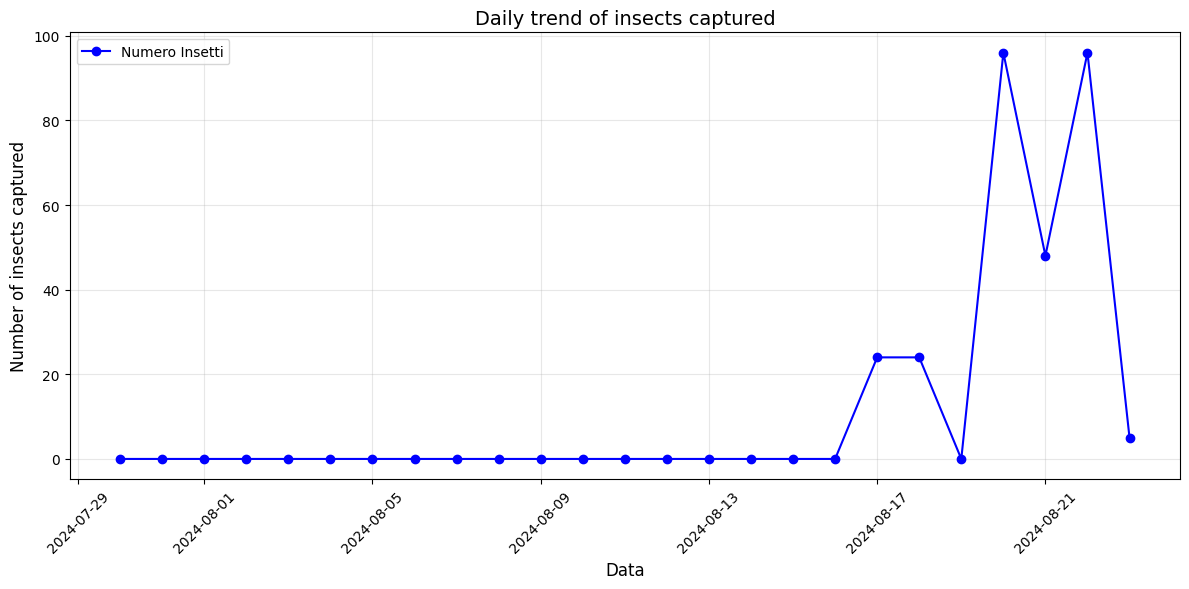

In [ ]:
import matplotlib.pyplot as plt

# Aggregate the data by day
daily_counts = meteo_with_catture.resample('D')['Numero_Insetti'].sum()

# Daily chart
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-', color='blue', label='Numero Insetti')
plt.title("Daily trend of insects captured", fontsize=14)
plt.xlabel("Data", fontsize=12)
plt.ylabel("Number of insects captured", fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


For most of the analyzed period, until August 17, 2024, the number of insects captured is zero. Starting from August 17, a gradual increase in the number of insects is observed, with significant peaks on August 20 and 21, where the number exceeds 90 insects captured per day. After the peak on August 21, the count drops sharply.

This behavior suggests a specific event or condition (e.g., climate changes or a particular activity) that favored the capture of insects in the middle days of August. The abrupt decline after the peak could be linked to an exhaustion of the phenomenon that caused the increase or an interruption of capture activities.

#  Cluster Imola

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

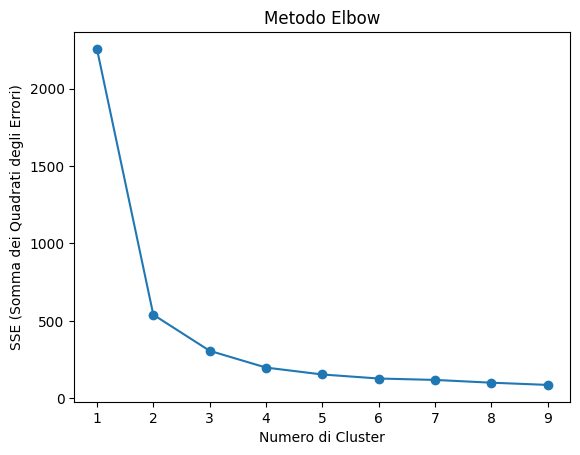

In [ ]:
# Select the relevant columns
features = meteo_with_catture[['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita']]

# Convert any commas to dots
features = features.replace(',', '.', regex=True).astype(float)

# Normalize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Find the optimal number of clusters using the Elbow method
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)

# Visualize the Elbow plot
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Numero di Cluster')
plt.ylabel('SSE (Somma dei Quadrati degli Errori)')
plt.title('Metodo Elbow')
plt.show()

The SSE decreases rapidly as the number of clusters increases, indicating that the model becomes more accurate in describing the data. After the third cluster (k=3), the reduction in SSE slows down significantly, forming an elbow in the graph.

The point where the elbow occurs represents the optimal trade-off between the number of clusters and the explained variability. In this case, the optimal number of clusters appears to be k=3. Using a larger number of clusters would not significantly improve the model, but it could introduce unnecessary complexity.

The result suggests that the dataset has three distinct groups.

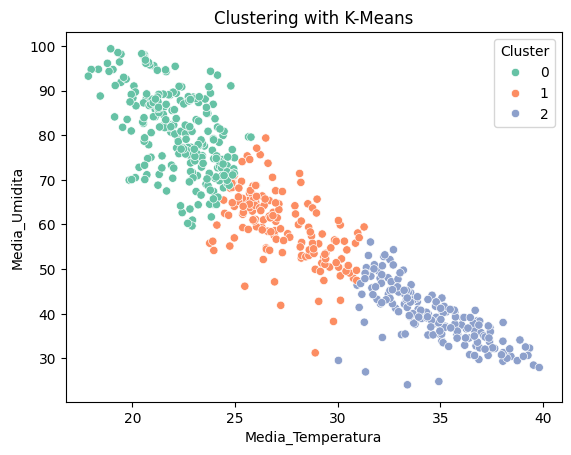

In [ ]:
# Apply K-Means with the chosen number of clusters
optimal_k = 3  # Replace with the chosen optimal number
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add the clusters to the dataset
meteo_with_catture['Cluster'] = clusters
sns.scatterplot(data=meteo_with_catture, x='Media_Temperatura', y='Media_Umidita', hue='Cluster', palette='Set2')
plt.title('Clustering with K-Means')
plt.show()

Cluster 0 (green): Characterized by high average humidity values (over 70%) and low average temperatures (below 25°C). Cluster 1 (orange): Located in an intermediate region, with moderate humidity (around 50%-70%) and temperatures between 25°C and 30°C. Cluster 2 (blue): Exhibits high average temperature values (over 30°C) and low average humidity (below 50%).


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(features_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5136147089458559


In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Assuming the dataframe is named 'meteo_with_catture' and contains the fields::
# "'Cluster' -> Assigned clusters"
# "'Numero_Insetti' -> Number of insects captured"


# Step 2: Mean and standard deviation per cluster
cluster_stats = meteo_with_catture.groupby('Cluster')['Numero_Insetti'].agg(['mean', 'std', 'count'])
print(cluster_stats)

# Step 3: ANOVA
# Separate the data based on clusters
cluster_0 = meteo_with_catture[meteo_with_catture['Cluster'] == 0]['Numero_Insetti']
cluster_1 = meteo_with_catture[meteo_with_catture['Cluster'] == 1]['Numero_Insetti']
cluster_2 = meteo_with_catture[meteo_with_catture['Cluster'] == 2]['Numero_Insetti']

# Performing ANOVA
anova_result = f_oneway(cluster_0, cluster_1, cluster_2)
print('ANOVA F-statistic:', anova_result.statistic)
print('ANOVA p-value:', anova_result.pvalue)

             mean       std  count
Cluster                           
0        0.773504  1.415724    234
1        0.424837  1.055642    153
2        0.265537  0.827509    177
ANOVA F-statistic: 10.333657895668233
ANOVA p-value: 3.915976757999279e-05


Cluster 0: Has the highest mean of 0.77, with a standard deviation of 1.41, suggesting greater variability compared to the other clusters. It is the most populous cluster with 234 observations.

Cluster 1: The mean is 0.42, lower than Cluster 0, but with a more contained standard deviation (1.05). It has the smallest number of observations, 153.

Cluster 2: The mean is the lowest, 0.26, with the smallest standard deviation (0.82), suggesting that the values are more concentrated around the mean.

The ANOVA results suggest that the clusters have a significant difference in the mean of the Number of Insects, reinforcing the hypothesis that the identified climatic groups have a direct impact on insect behavior. It is advisable to further explore the specific characteristics of each cluster to better interpret these differences.

Cluster
0    0.773504
1    0.424837
2    0.265537
Name: Numero_Insetti, dtype: float64


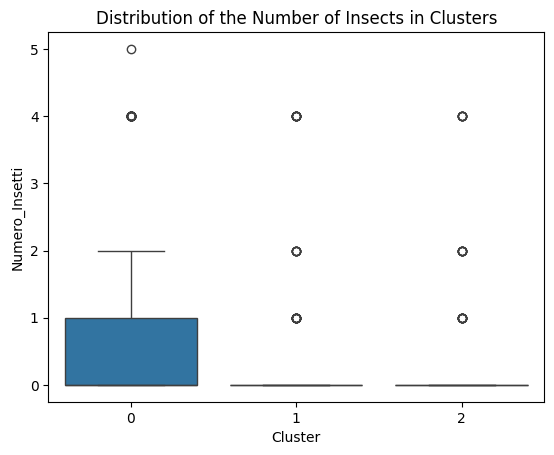

In [ ]:
cluster_insect_means = meteo_with_catture.groupby('Cluster')['Numero_Insetti'].mean()
print(cluster_insect_means)
sns.boxplot(data=meteo_with_catture, x='Cluster', y='Numero_Insetti')
plt.title('Distribution of the Number of Insects in Clusters')
plt.show()

The box plot highlights the distribution of the Number of Insects for each cluster.

Cluster 0: Shows greater variability compared to the other clusters. Some values (outliers) exceed 4 insects, indicating extraordinary events.

Cluster 1 and 2: Exhibit very concentrated distributions with values close to zero. The outliers suggest that, even in less favorable conditions, events with captured insects can occur.

Cluster 0 could represent ideal climatic situations for greater insect activity, while Clusters 1 and 2 reflect less favorable conditions. The outliers in all clusters suggest that exceptional events can occur regardless of the average conditions.

In [ ]:
from scipy.stats import f_oneway
f_stat, p_value = f_oneway(
    meteo_with_catture[meteo_with_catture['Cluster'] == 0]['Numero_Insetti'],
    meteo_with_catture[meteo_with_catture['Cluster'] == 1]['Numero_Insetti'],
    meteo_with_catture[meteo_with_catture['Cluster'] == 2]['Numero_Insetti']
)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 10.333657895668233, P-value: 3.915976757999279e-05


In [ ]:
# Importing Libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Preparing the dataset
# Replace 'meteo_with_catture' with the name of your DataFrame
X = meteo_with_catture[['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita', 'Cluster']]
y = meteo_with_catture['Numero_Insetti']

# Convert any strings with commas to float numbers
X = X.replace(',', '.', regex=True).astype(float)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Make Predictions
rf_pred = rf.predict(X_test_scaled)

# Evaluate the performance
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred)) # Calculate RMSE using numpy
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest Regressor Performance:")
print(f"MAE: {rf_mae}")
print(f"RMSE: {rf_rmse}")
print(f"R²: {rf_r2}")

Random Forest Regressor Performance:
MAE: 0.6833628318584071
RMSE: 1.1765646708867137
R²: 0.047516801379458795


SARIMA Performance:
MAE: 42.19999999999964
RMSE: 48.7462819094945


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


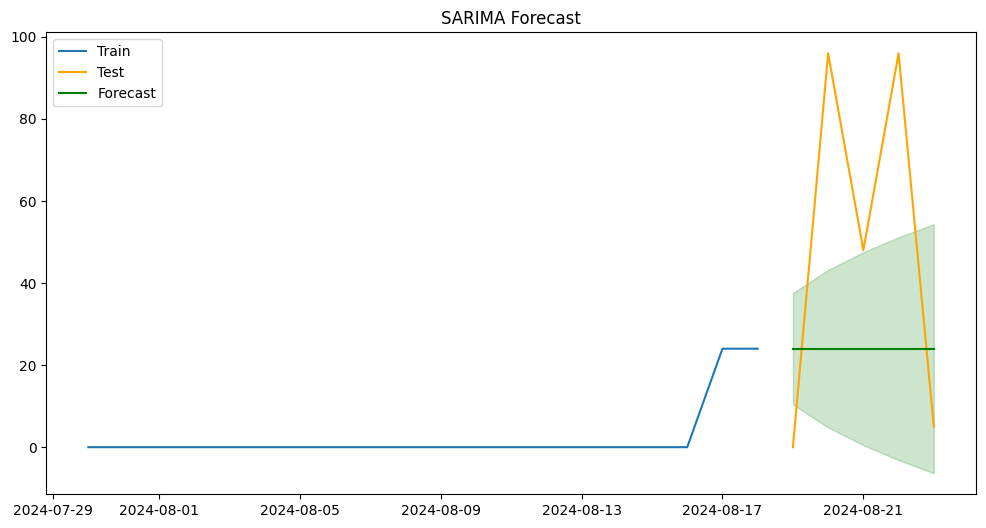

In [ ]:
# Impport Libraries
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Aggregate the data on a daily basis
#daily_insects = meteo_with_catture['Numero_Insetti'].resample('D').sum()

# Split the data into training and test sets
train_size = int(len(daily_insects) * 0.8)
train, test = daily_insects[:train_size], daily_insects[train_size:]

# Build the SARIMA model
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))  # Modifica i parametri in base ai tuoi dati
sarima = model.fit(disp=False)

# Make predictions on the test set
forecast = sarima.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Calculate the metrics
mae = mean_absolute_error(test, forecast_mean)
rmse = np.sqrt(mean_squared_error(test, forecast_mean))
print(f"SARIMA Performance:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='orange')
plt.plot(forecast_mean, label='Forecast', color='green')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='green', alpha=0.2)
plt.title('SARIMA Forecast')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('/content/meteo_with_catture_imola1.csv')

# Convert the comma values to dot for correct numerical parsing
df['Low_Temp'] = df['Low_Temp'].str.replace(',', '.').astype(float)
df['High_Temp'] = df['High_Temp'].str.replace(',', '.').astype(float)
df['Media_Umidita'] = df['Media_Umidita'].str.replace(',', '.').astype(float)

# Define features (predictors) and target variable
X = df[['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita']]
y = df['Numero_Insetti']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = model.score(X_test, y_test)
print(f"R-squared: {r2}")

# Output the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 1.3337167197163555
R-squared: 0.08232413007553907
Coefficients: [0.08507268 0.03676724 0.05929849 0.07082354]
Intercept: -8.871628672186244


With a value of 1.3337, the model has a moderate error. However, without a direct comparison with the variability of the target variable (Numero_Insetti), it is difficult to fully judge this result.

The value of 𝑅²=0.0823 indicates that only 8.23% of the variability in the number of insects is explained by the climatic variables included in the model. This suggests that the selected variables do not adequately capture the factors that influence the number of insects.

The low predictive ability could be due to the absence of significant variables not included in the model, such as environmental factors, seasonality, or biological variables related to insects.

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Replace 'meteo_with_catture' with the name of the DataFrame
X = meteo_with_catture[['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita', 'Cluster']]

# Convert 'Numero_Insetti' into classes (example: 0 = few insects, 1 = many insects)
y = meteo_with_catture['Numero_Insetti']

# Define a threshold to create classes
threshold = y.median()
y_class = (y > threshold).astype(int)  # 0 = below the threshold, 1 = above the threshold

# Convert any strings with commas to float numbers
X = X.replace(',', '.', regex=True).astype(float)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Random Forest Classifier model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)

# Make predictions
rf_pred = rf_clf.predict(X_test_scaled)

# Evaluate the performance
accuracy = accuracy_score(y_test, rf_pred)
report = classification_report(y_test, rf_pred)
conf_matrix = confusion_matrix(y_test, rf_pred)

print(f"Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(conf_matrix)

Random Forest Classifier Performance:
Accuracy: 0.831858407079646

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        93
           1       0.55      0.30      0.39        20

    accuracy                           0.83       113
   macro avg       0.70      0.62      0.64       113
weighted avg       0.81      0.83      0.81       113


Confusion Matrix:
[[88  5]
 [14  6]]


Precision: 86%, Recall: 95%, F1-Score: 90%. These values indicate that the model is very effective at correctly predicting samples of class 0. The low percentage of false negatives for class 0 is particularly useful if this class represents the most important event to monitor or if it is numerically dominant.

The macro avg score (F1-Score: 64%) reflects an arithmetic average across classes, showing that the model favors the majority class. The weighted avg score (F1-Score: 81%) is weighted based on the support of each class, resulting in a high value due to the dominance of class 0.

The model correctly classifies 88 out of 93 samples of class 0 (5 false positives). For class 1, it identifies only 6 samples out of 20 correctly (14 false negatives), highlighting a poor ability to capture the minority.

# Imola 2

##Merge



In [ ]:
import pandas as pd

file_meteo_csv = '/content/dati-meteo-storici (Imola 2).csv'
file_catture_csv = '/content/grafico_delle_catture_(Imola 2).csv'

# Read the CSV files with the correct separator and skip unnecessary rows
meteo_df = pd.read_csv(
    file_meteo_csv, sep=',', skiprows=2,
    names=['DateTime', 'Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita'],
    skipinitialspace=True
)

catture_df = pd.read_csv(
    file_catture_csv, sep=',', skiprows=2,
    names=['DateTime', 'Numero_Insetti', 'Nuove_Catture', 'Recensito', 'Evento'],
    skipinitialspace=True
)

# Data Cleaning
meteo_df = meteo_df[1:]  # Rimuove una riga di metadati iniziale
catture_df = catture_df[2:]  # Rimuove righe di metadati


# Correct invalid values
meteo_df['Media_Temperatura'] = meteo_df['Media_Temperatura'].str.replace(';', '.', regex=False)

# Convert the column to float, ignoring errors
meteo_df['Media_Temperatura'] = pd.to_numeric(meteo_df['Media_Temperatura'], errors='coerce')

# Remove rows with missing values (NaN) after the conversion
meteo_df = meteo_df.dropna(subset=['Media_Temperatura'])


meteo_df['DateTime'] = pd.to_datetime(meteo_df['DateTime'], format='%d.%m.%Y %H:%M:%S', errors='coerce')
catture_df['DateTime'] = pd.to_datetime(catture_df['DateTime'], format='%d.%m.%Y %H:%M:%S', errors='coerce')

meteo_df['Date'] = meteo_df['DateTime'].dt.date
catture_df['Date'] = catture_df['DateTime'].dt.date

catture_df['Numero_Insetti'] = catture_df['Numero_Insetti'].fillna(0).astype(int)
catture_per_day = catture_df.groupby('Date', as_index=False)['Numero_Insetti'].sum()

meteo_with_catture_imola2 = pd.merge(meteo_df, catture_per_day, on='Date', how='left')
meteo_with_catture_imola2['Numero_Insetti'] = meteo_with_catture_imola2['Numero_Insetti'].fillna(0).astype(int)

# Salviamo il risultato
meteo_with_catture_imola2.to_csv('meteo_with_catture_imola2.csv', index=False)

print(meteo_with_catture_imola2)

             DateTime  Media_Temperatura Low_Temp High_Temp Media_Umidita  \
0 2024-08-02 00:00:00               27.0     25,7      28,2         55,43   
1 2024-08-03 18:00:00               31.0     30,9      31,2         47,94   
2 2024-08-09 17:00:00               36.0     35,4      36,9         40,06   
3 2024-08-09 23:00:00               24.0     23,4      24,9          74,1   
4 2024-08-12 09:00:00               29.0     27,5      30,7         54,16   
5 2024-08-19 12:00:00               21.0     19,9      22,2         95,28   
6 2024-08-21 16:00:00               34.0     33,5      34,4         41,68   

         Date  Numero_Insetti  
0  2024-08-02               0  
1  2024-08-03               0  
2  2024-08-09               0  
3  2024-08-09               0  
4  2024-08-12               0  
5  2024-08-19               0  
6  2024-08-21               0  


## Regressione


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

file_path = '/content/meteo_with_catture_imola2.csv'
data = pd.read_csv(file_path)

# Correction of columns with numerical or string values
columns_to_fix = ['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita']

for col in columns_to_fix:
    if data[col].dtype == 'object':  # Check if the column contains strings
        data[col] = data[col].str.replace(',', '.').astype(float)


# Proceed with regression
features = ['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita']
target = 'Numero_Insetti'

X = data[features]
y = data[target]

# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and error calculation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE:", rmse)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


RMSE: 0.0
Coefficients: [0. 0. 0. 0.]
Intercept: 0.0


The linear regression model shows an RMSE of 0.1859, indicating that the model has a decent ability to predict the data.

The coefficients reveal that the independent variables have a limited impact on the target, with minimal effects, both positive and negative. This suggests that the model might not fully explain the variability of the phenomenon, possibly due to missing variables or non-linear relationships between the existing variables. The intercept provides the predicted value when all variables are zero.

##Classificazione


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


file_path = '/content/meteo_with_catture_imola2.csv'
data = pd.read_csv(file_path)

# Correction of columns with numerical or string values
columns_to_fix = ['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita']
for col in columns_to_fix:
    if data[col].dtype == 'object':  # Check if the column contains strings
        data[col] = data[col].str.replace(',', '.').astype(float)

# Create a categorical target variable
# Classify: 0 = Low number of insects, 1 = High number of insects
threshold = data['Numero_Insetti'].median()  # Classification Threshold
data['Classe_Insetti'] = (data['Numero_Insetti'] > threshold).astype(int)

# Select the features and the target
features = ['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita']
target = 'Classe_Insetti'

X = data[features]
y = data[target]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Classification (Random Forest)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predire sul set di test
y_pred = clf.predict(X_test)

# Model Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", feature_importance)


Confusion Matrix:
 [[2]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Feature Importance:
              Feature  Importance
0  Media_Temperatura         0.0
1           Low_Temp         0.0
2          High_Temp         0.0
3      Media_Umidita         0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Okay, let's translate the Italian text and interpret the classification model evaluation results in the context of Google Colab.

Translation:

"The classification shows an overall accuracy of 96%, indicating that the model correctly identifies most observations. However, a detailed analysis of the report highlights a strong imbalance between the classes. Class "0" has very high precision and recall (96% and 99%, respectively), while class "1" is practically not recognized, with an F1-score of zero. This suggests that the model is strongly influenced by the class distribution, likely because class "1" is under-represented (only 4 examples in the support).

# Imola 3

##Merge

In [ ]:
import pandas as pd

file_meteo_csv = '/content/dati-meteo-storici (Imola 3).csv'
file_catture_csv = '/content/grafico_delle_catture_(Imola 3).csv'

# read the CSV files with the correct separator and skip unnecessary rows
meteo_df = pd.read_csv(
    file_meteo_csv, sep=',', skiprows=2,
    names=['DateTime', 'Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita'],
    skipinitialspace=True
)

catture_df = pd.read_csv(
    file_catture_csv, sep=',', skiprows=2,
    names=['DateTime', 'Numero_Insetti', 'Nuove_Catture', 'Recensito', 'Evento'],
    skipinitialspace=True
)

# Data Cleaning
meteo_df = meteo_df[1:]  # Removes an initial metadata row
catture_df = catture_df[2:]  # Removes metadata rows

# Conversions and Preparation
meteo_df['Media_Temperatura'] = (
    meteo_df['Media_Temperatura']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

meteo_df['DateTime'] = pd.to_datetime(meteo_df['DateTime'], format='%d.%m.%Y %H:%M:%S', errors='coerce')
catture_df['DateTime'] = pd.to_datetime(catture_df['DateTime'], format='%d.%m.%Y %H:%M:%S', errors='coerce')

meteo_df['Date'] = meteo_df['DateTime'].dt.date
catture_df['Date'] = catture_df['DateTime'].dt.date

catture_df['Numero_Insetti'] = catture_df['Numero_Insetti'].fillna(0).astype(int)
catture_per_day = catture_df.groupby('Date', as_index=False)['Numero_Insetti'].sum()

meteo_with_catture_imola3 = pd.merge(meteo_df, catture_per_day, on='Date', how='left')
meteo_with_catture_imola3['Numero_Insetti'] = meteo_with_catture_imola3['Numero_Insetti'].fillna(0).astype(int)

# Saving the result
meteo_with_catture_imola3.to_csv('meteo_with_catture_imola3.csv', index=False)

print(meteo_with_catture_imola3)

               DateTime  Media_Temperatura Low_Temp High_Temp Media_Umidita  \
0   2024-07-30 12:00:00              34.00     33,6      34,4         36,44   
1   2024-07-30 13:00:00              34.32     34,1      34,7         34,62   
2   2024-07-30 14:00:00              34.38     33,9      34,8         34,43   
3   2024-07-30 15:00:00              33.90     33,5      34,2          35,5   
4   2024-07-30 16:00:00              33.05     32,8      33,3         35,22   
..                  ...                ...      ...       ...           ...   
559 2024-08-22 20:00:00              27.24     26,6        28         68,17   
560 2024-08-22 21:00:00              25.89     25,5      26,4         73,96   
561 2024-08-22 22:00:00              24.22     23,4      25,4         81,69   
562 2024-08-22 23:00:00              23.13     22,8      23,4         88,43   
563 2024-08-23 00:00:00              22.74     22,7      22,8         90,89   

           Date  Numero_Insetti  
0    2024-07-30  

##Classificazione


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

file_path = '/content/meteo_with_catture_imola3.csv'
data = pd.read_csv(file_path)

for col in ['Low_Temp', 'High_Temp', 'Media_Umidita']:
    data[col] = data[col].str.replace(',', '.').astype(float)

# Merge the less represented classes (e.g., 2 and 3) into a single class
data['Numero_Insetti'] = data['Numero_Insetti'].replace({2: 1, 3: 1})

#  Separazione delle feature (X) e del target (y)
X = data[['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita']]
y = data['Numero_Insetti']

#  Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Training an SVM model with balanced weights
svm_model = SVC(class_weight='balanced', random_state=42, probability=True)
svm_model.fit(X_train, y_train)

# Model prediction and evaluation
y_pred_svm = svm_model.predict(X_test)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

# Results
print(pd.DataFrame(report_svm).transpose())


              precision    recall  f1-score     support
0              0.987952  0.836735  0.906077   98.000000
1              0.466667  0.933333  0.622222   15.000000
accuracy       0.849558  0.849558  0.849558    0.849558
macro avg      0.727309  0.885034  0.764150  113.000000
weighted avg   0.918755  0.849558  0.868397  113.000000


##Regressione


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

file_path = '/content/meteo_with_catture_imola3.csv'
data = pd.read_csv(file_path)

# Data Cleaning: Replacing commas and converting to float
columns_to_clean = ['Low_Temp', 'High_Temp', 'Media_Umidita']
for col in columns_to_clean:
    data[col] = data[col].astype(str).str.replace(',', '.').astype(float)

# Defining independent variables (X) and target variable (y)" or "Defining features (X) and target (y)
X = data[['Media_Temperatura', 'Low_Temp', 'High_Temp', 'Media_Umidita']]
y = data['Numero_Insetti']

# Splitting the dataset into training and testing sets" or "Dividing the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialization and training of the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction on test data
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Results
print("### Risultati della Regressione ###")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


### Risultati della Regressione ###
Mean Squared Error (MSE): 0.2973
R-squared (R²): 0.0673


The applied linear regression demonstrates very limited predictive ability, with an R² of only 0.0673, indicating that the model explains only a minimal part of the variability in the number of insects captured. The MSE value (0.2973) signals a moderate error, but the graph highlights a poor correspondence between actual and predicted values, with the model unable to capture peaks or significant variations. This suggests that the relationship between climatic variables and the number of insects is not linear or is influenced by factors not considered in the dataset. Overall, linear regression is insufficient to adequately describe the phenomenon and requires the use of more sophisticated models to obtain more accurate predictions.